# Supermarket Sales - Exploratory Data Analysis
## Comprehensive EDA on Supermarket Sales Dataset

This notebook performs a complete exploratory data analysis including:
- Data overview and quality checks
- Statistical analysis of numerical and categorical variables
- Correlation analysis
- Time series analysis
- Sales analysis by various dimensions
- Customer behavior analysis
- Advanced visualizations and insights

## 1. Import Libraries and Load Data

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from datetime import datetime

# Configure settings
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
%matplotlib inline

print("Libraries imported successfully!")

Libraries imported successfully!


In [2]:
# Load the dataset
df = pd.read_csv('supermarket_sales - Sheet1.csv')
print("Dataset loaded successfully!")
print(f"Dataset shape: {df.shape}")

Dataset loaded successfully!
Dataset shape: (1000, 17)


## 2. Initial Data Exploration

In [3]:
# Display first few rows
print("First 5 rows of the dataset:")
df.head()

First 5 rows of the dataset:


,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [4]:
# Display last few rows
print("Last 5 rows of the dataset:")
df.tail()

Last 5 rows of the dataset:


,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1
999,849-09-3807,A,Yangon,Member,Female,Fashion accessories,88.34,7,30.9190,649.2990,2/18/2019,13:28,Cash,618.38,4.761905,30.9190,6.6


In [5]:
# Dataset information
print("Dataset Information:")
df.info()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gros

In [6]:
# Column names
print("Column names:")
print(df.columns.tolist())

Column names:
['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender', 'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date', 'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income', 'Rating']


In [7]:
# Data types
print("Data types:")
df.dtypes

Data types:


Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                     int64
Tax 5%                     float64
Total                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object

In [8]:
# Statistical summary of numerical columns
print("Statistical Summary of Numerical Variables:")
df.describe()

Statistical Summary of Numerical Variables:


,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,0.000000,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905,49.650000,10.00000


In [9]:
# Statistical summary of categorical columns
print("Statistical Summary of Categorical Variables:")
df.describe(include='object')

Statistical Summary of Categorical Variables:


,Invoice ID,Branch,City,Customer type,Gender,Product line,Date,Time,Payment
count,1000,1000,1000,1000,1000,1000,1000,1000,1000
unique,1000,3,3,2,2,6,89,506,3
top,750-67-8428,A,Yangon,Member,Female,Fashion accessories,2/7/2019,19:48,Ewallet
freq,1,340,340,501,501,178,20,7,345


## 3. Data Quality Checks

In [10]:
# Check for missing values
print("Missing Values Count:")
missing_values = df.isnull().sum()
print(missing_values)
print(f"\nTotal missing values: {missing_values.sum()}")

Missing Values Count:
Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

Total missing values: 0


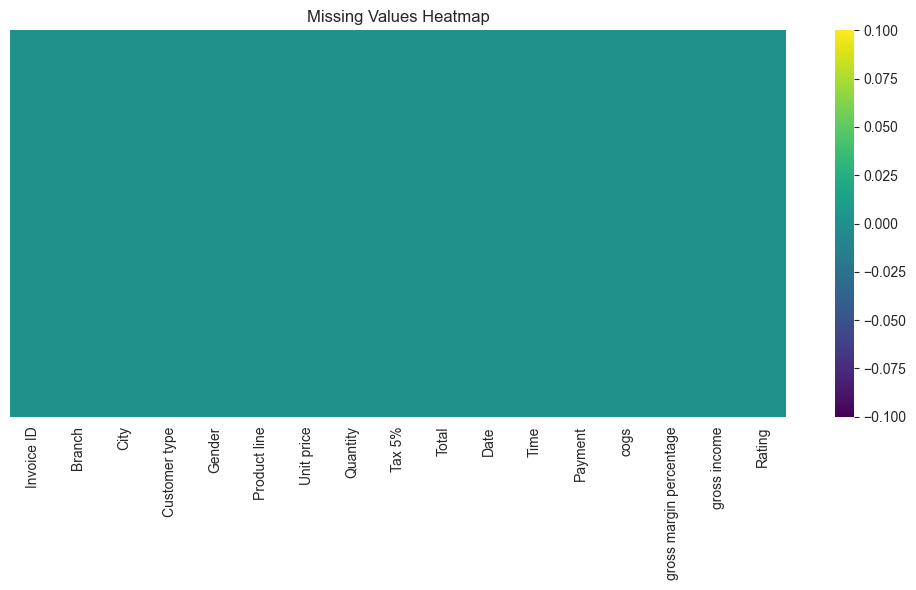

In [11]:
# Visualize missing values
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=True, cmap='viridis', yticklabels=False)
plt.title('Missing Values Heatmap')
plt.tight_layout()
plt.show()

In [12]:
# Check for duplicate rows
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 0


In [13]:
# Check for duplicate Invoice IDs
duplicate_invoices = df['Invoice ID'].duplicated().sum()
print(f"Number of duplicate Invoice IDs: {duplicate_invoices}")

Number of duplicate Invoice IDs: 0


## 4. Data Preprocessing

In [14]:
# Convert Date and Time columns to proper datetime format
df['Date'] = pd.to_datetime(df['Date'])
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M').dt.time

# Create a datetime column combining Date and Time
df['DateTime'] = pd.to_datetime(df['Date'].astype(str) + ' ' + df['Time'].astype(str))

# Extract additional time features
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Month_Name'] = df['Date'].dt.month_name()
df['Day'] = df['Date'].dt.day
df['Day_of_Week'] = df['Date'].dt.day_name()
df['Hour'] = df['DateTime'].dt.hour
df['Week'] = df['Date'].dt.isocalendar().week

print("Date and time preprocessing completed!")
print(f"\nDate range: {df['Date'].min()} to {df['Date'].max()}")

Date and time preprocessing completed!

Date range: 2019-01-01 00:00:00 to 2019-03-30 00:00:00


## 5. Univariate Analysis - Numerical Variables

In [15]:
# Select numerical columns
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print("Numerical columns:")
print(numerical_cols)

Numerical columns:
['Unit price', 'Quantity', 'Tax 5%', 'Total', 'cogs', 'gross margin percentage', 'gross income', 'Rating', 'Year', 'Month', 'Day', 'Hour', 'Week']


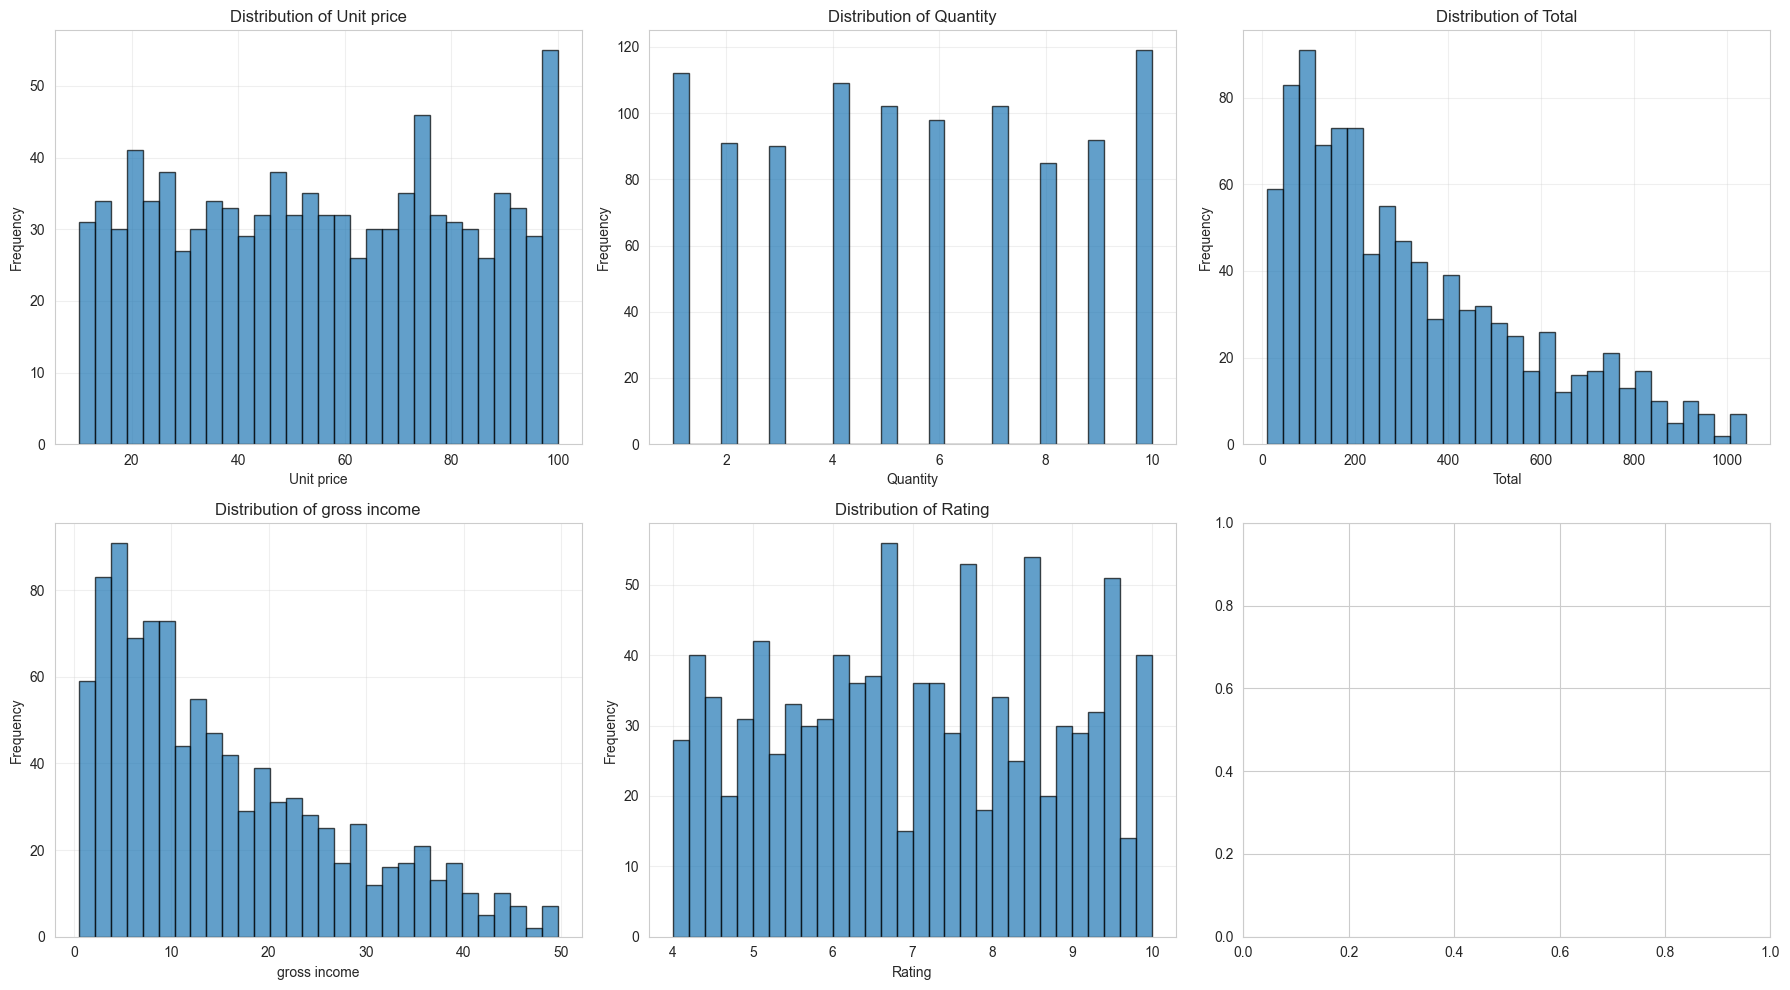

In [16]:
# Distribution of key numerical variables
key_numerical = ['Unit price', 'Quantity', 'Total', 'gross income', 'Rating']

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.ravel()

for idx, col in enumerate(key_numerical):
    axes[idx].hist(df[col], bins=30, edgecolor='black', alpha=0.7)
    axes[idx].set_title(f'Distribution of {col}')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Frequency')
    axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

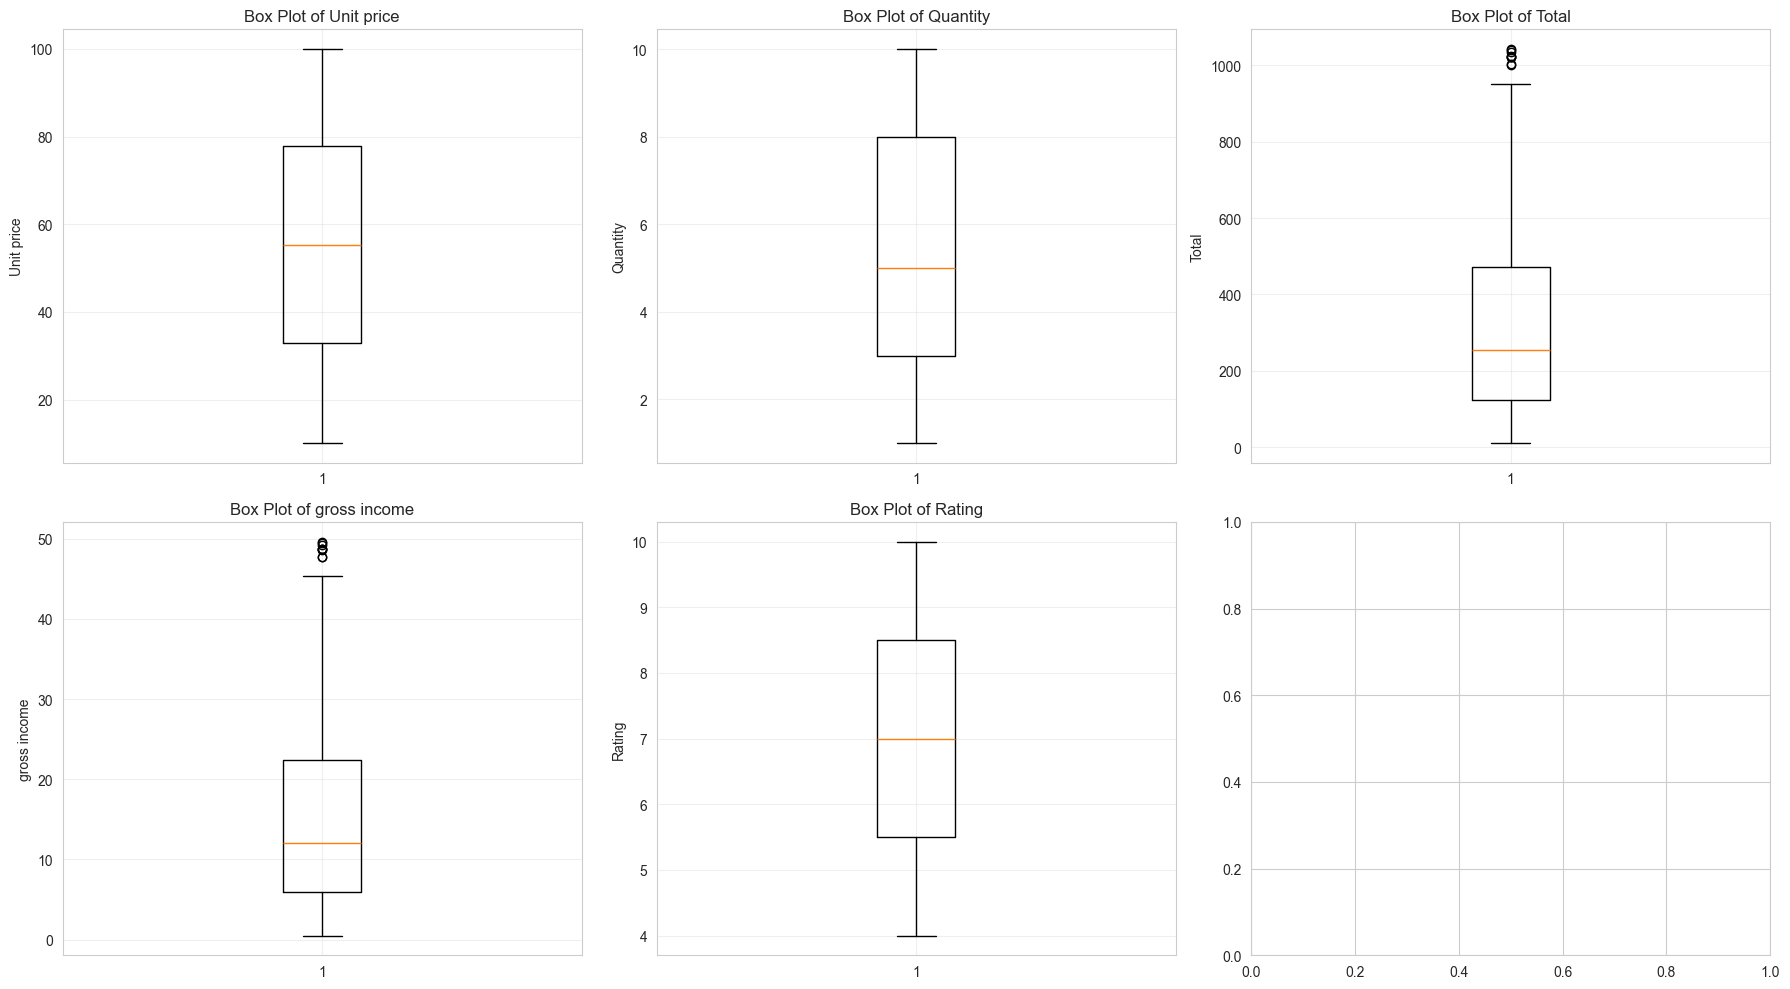

In [17]:
# Box plots for numerical variables
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.ravel()

for idx, col in enumerate(key_numerical):
    axes[idx].boxplot(df[col].dropna())
    axes[idx].set_title(f'Box Plot of {col}')
    axes[idx].set_ylabel(col)
    axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [18]:
# Detailed statistics for key numerical variables
print("Detailed Statistics for Key Numerical Variables:")
print("="*80)
for col in key_numerical:
    print(f"\n{col}:")
    print(f"  Mean: {df[col].mean():.2f}")
    print(f"  Median: {df[col].median():.2f}")
    print(f"  Mode: {df[col].mode()[0]:.2f}")
    print(f"  Std Dev: {df[col].std():.2f}")
    print(f"  Min: {df[col].min():.2f}")
    print(f"  Max: {df[col].max():.2f}")
    print(f"  Range: {df[col].max() - df[col].min():.2f}")
    print(f"  Skewness: {df[col].skew():.2f}")
    print(f"  Kurtosis: {df[col].kurtosis():.2f}")

Detailed Statistics for Key Numerical Variables:

Unit price:
  Mean: 55.67
  Median: 55.23
  Mode: 83.77
  Std Dev: 26.49
  Min: 10.08
  Max: 99.96
  Range: 89.88
  Skewness: 0.01
  Kurtosis: -1.22

Quantity:
  Mean: 5.51
  Median: 5.00
  Mode: 10.00
  Std Dev: 2.92
  Min: 1.00
  Max: 10.00
  Range: 9.00
  Skewness: 0.01
  Kurtosis: -1.22

Total:
  Mean: 322.97
  Median: 253.85
  Mode: 87.23
  Std Dev: 245.89
  Min: 10.68
  Max: 1042.65
  Range: 1031.97
  Skewness: 0.89
  Kurtosis: -0.08

gross income:
  Mean: 15.38
  Median: 12.09
  Mode: 4.15
  Std Dev: 11.71
  Min: 0.51
  Max: 49.65
  Range: 49.14
  Skewness: 0.89
  Kurtosis: -0.08

Rating:
  Mean: 6.97
  Median: 7.00
  Mode: 6.00
  Std Dev: 1.72
  Min: 4.00
  Max: 10.00
  Range: 6.00
  Skewness: 0.01
  Kurtosis: -1.15


## 6. Univariate Analysis - Categorical Variables

In [19]:
# Select categorical columns
categorical_cols = ['Branch', 'City', 'Customer type', 'Gender', 'Product line', 'Payment']

print("Categorical Variables Analysis:")
print("="*80)
for col in categorical_cols:
    print(f"\n{col}:")
    print(df[col].value_counts())
    print(f"\nPercentage distribution:")
    print(df[col].value_counts(normalize=True) * 100)

Categorical Variables Analysis:

Branch:
Branch
A    340
B    332
C    328
Name: count, dtype: int64

Percentage distribution:
Branch
A    34.0
B    33.2
C    32.8
Name: proportion, dtype: float64

City:
City
Yangon       340
Mandalay     332
Naypyitaw    328
Name: count, dtype: int64

Percentage distribution:
City
Yangon       34.0
Mandalay     33.2
Naypyitaw    32.8
Name: proportion, dtype: float64

Customer type:
Customer type
Member    501
Normal    499
Name: count, dtype: int64

Percentage distribution:
Customer type
Member    50.1
Normal    49.9
Name: proportion, dtype: float64

Gender:
Gender
Female    501
Male      499
Name: count, dtype: int64

Percentage distribution:
Gender
Female    50.1
Male      49.9
Name: proportion, dtype: float64

Product line:
Product line
Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: count, dtype: int64

Percenta

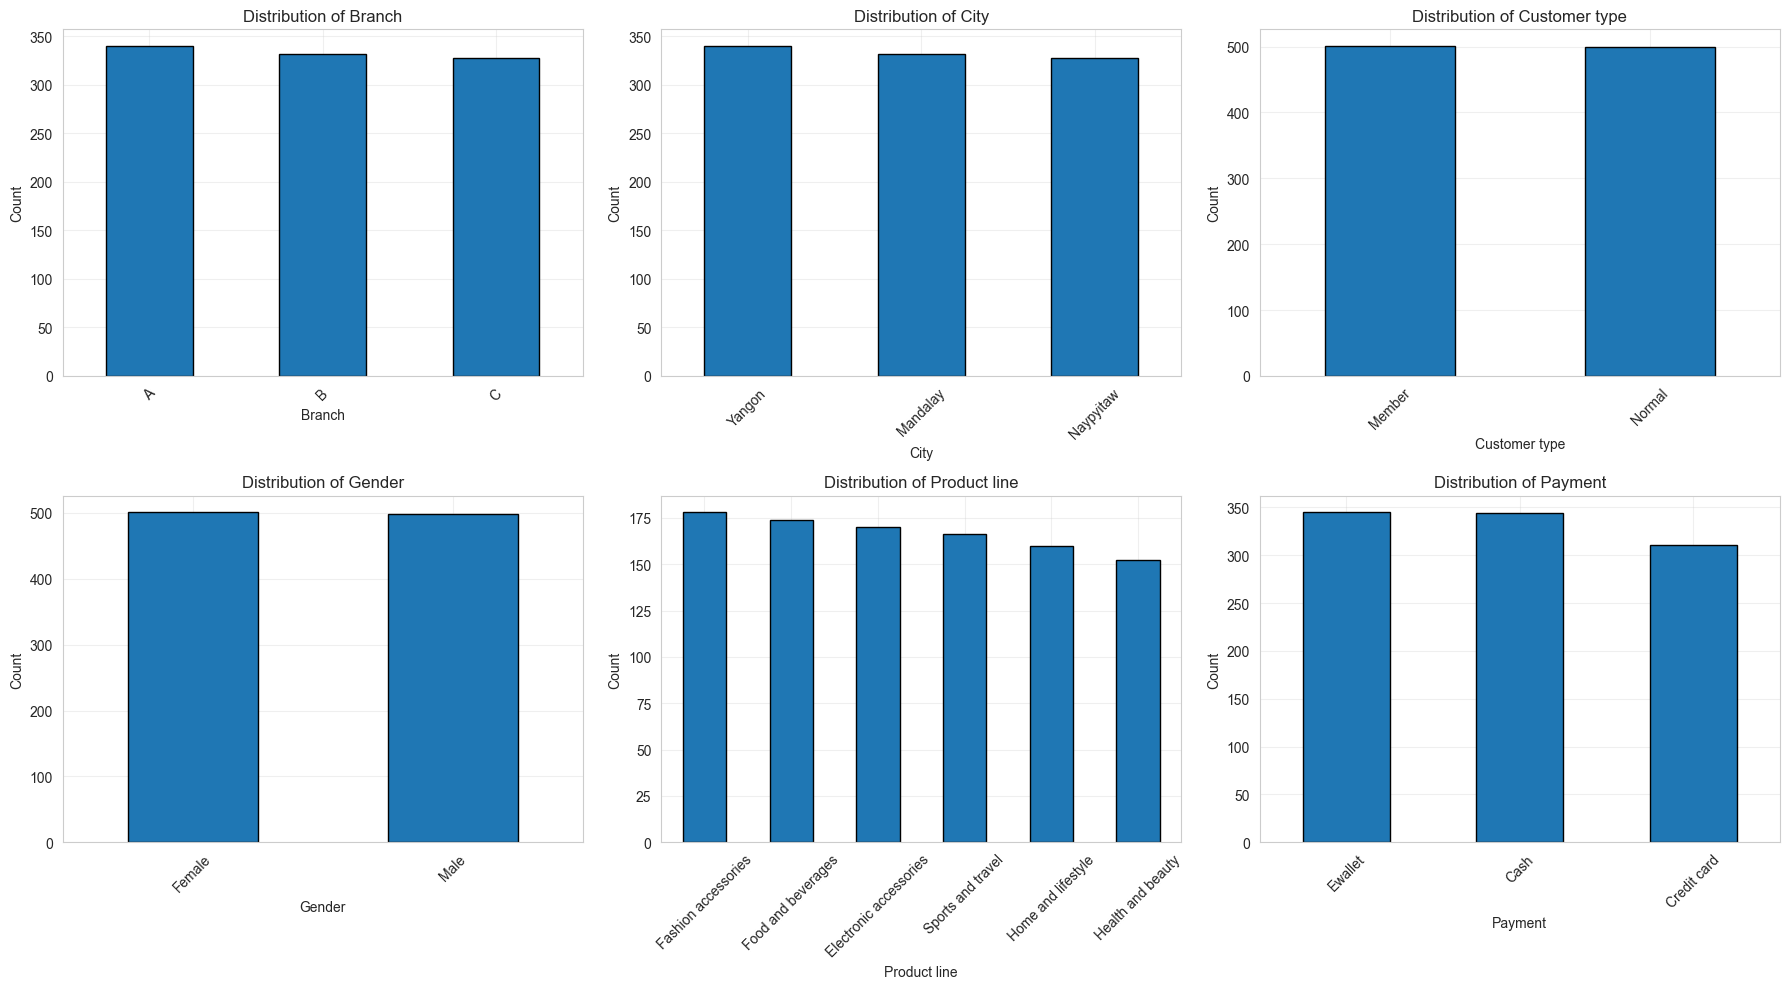

In [20]:
# Visualize categorical variables
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.ravel()

for idx, col in enumerate(categorical_cols):
    df[col].value_counts().plot(kind='bar', ax=axes[idx], edgecolor='black')
    axes[idx].set_title(f'Distribution of {col}')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Count')
    axes[idx].tick_params(axis='x', rotation=45)
    axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

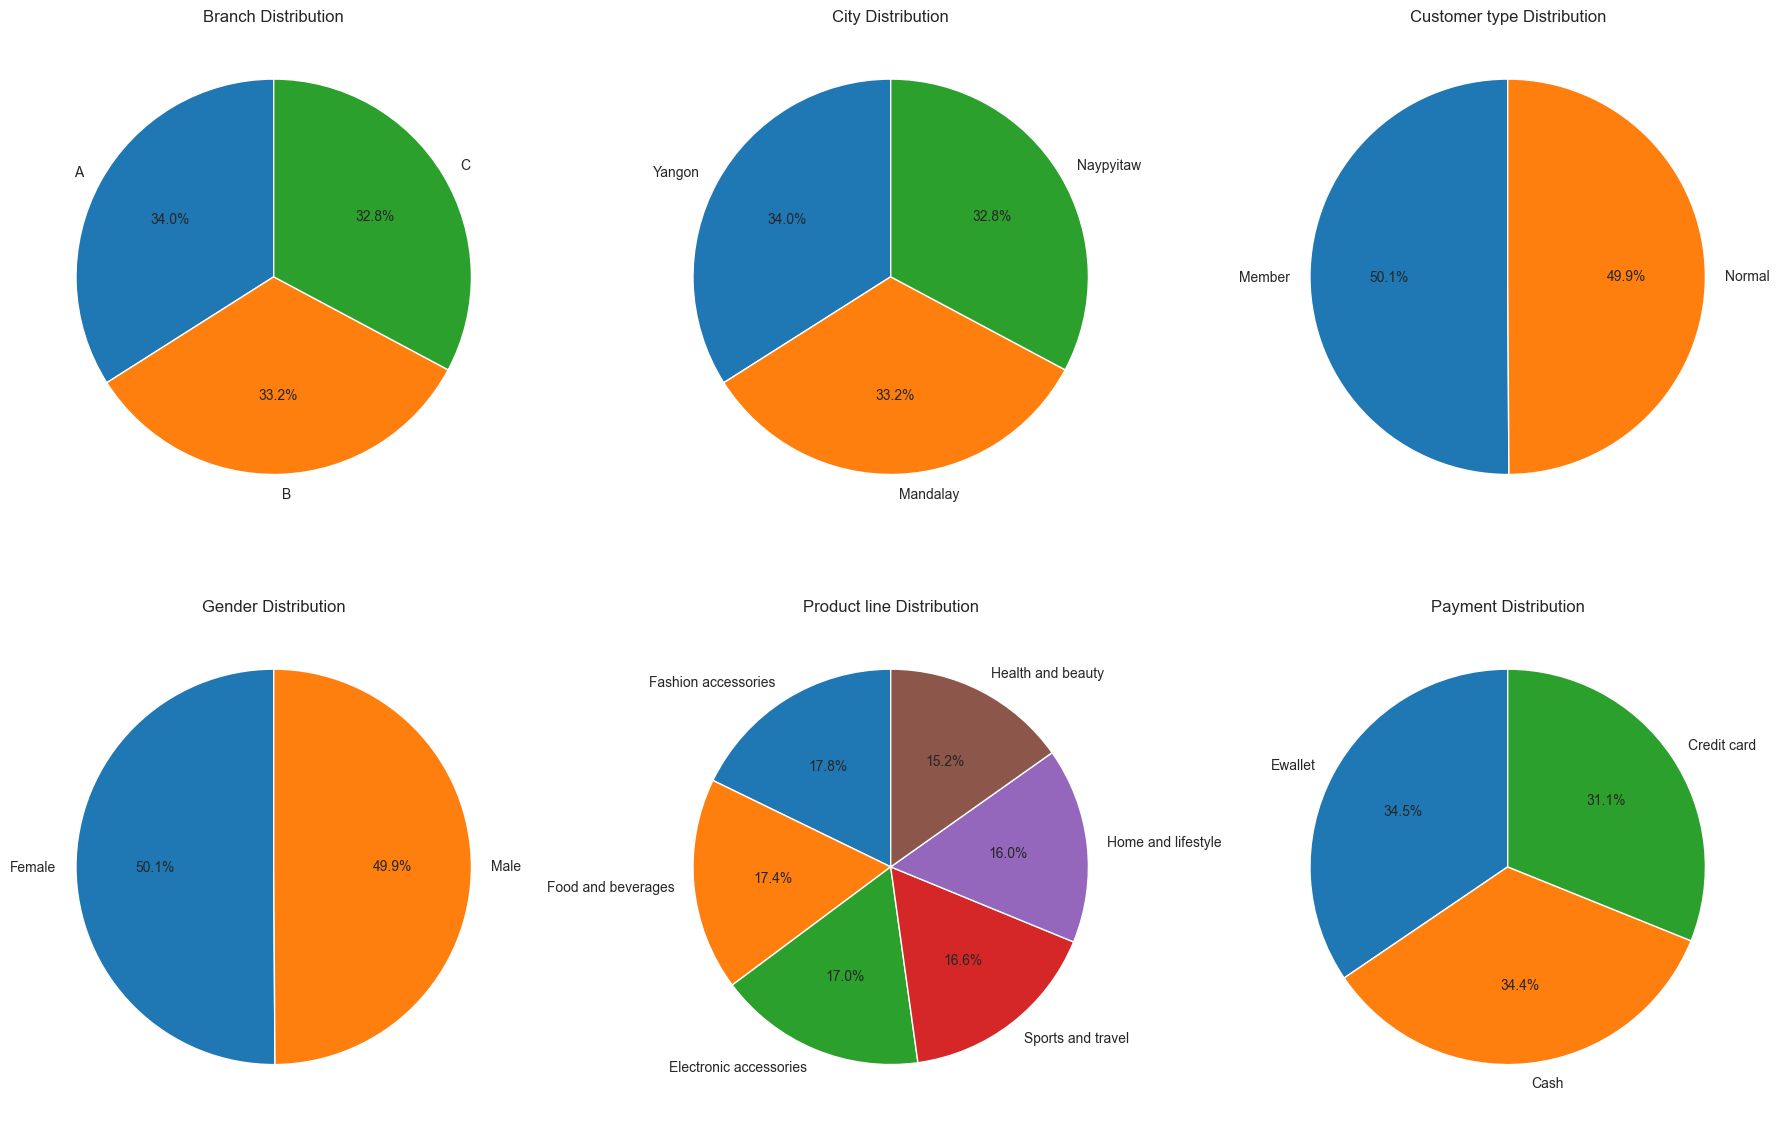

In [21]:
# Pie charts for categorical variables
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

for idx, col in enumerate(categorical_cols):
    df[col].value_counts().plot(kind='pie', ax=axes[idx], autopct='%1.1f%%', startangle=90)
    axes[idx].set_title(f'{col} Distribution')
    axes[idx].set_ylabel('')

plt.tight_layout()
plt.show()

## 7. Correlation Analysis

In [22]:
# Correlation matrix for numerical variables
numerical_for_corr = ['Unit price', 'Quantity', 'Tax 5%', 'Total', 'cogs', 'gross income', 'Rating']
correlation_matrix = df[numerical_for_corr].corr()

print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
              Unit price  Quantity    Tax 5%     Total      cogs  \
Unit price      1.000000  0.010778  0.633962  0.633962  0.633962   
Quantity        0.010778  1.000000  0.705510  0.705510  0.705510   
Tax 5%          0.633962  0.705510  1.000000  1.000000  1.000000   
Total           0.633962  0.705510  1.000000  1.000000  1.000000   
cogs            0.633962  0.705510  1.000000  1.000000  1.000000   
gross income    0.633962  0.705510  1.000000  1.000000  1.000000   
Rating         -0.008778 -0.015815 -0.036442 -0.036442 -0.036442   

              gross income    Rating  
Unit price        0.633962 -0.008778  
Quantity          0.705510 -0.015815  
Tax 5%            1.000000 -0.036442  
Total             1.000000 -0.036442  
cogs              1.000000 -0.036442  
gross income      1.000000 -0.036442  
Rating           -0.036442  1.000000  


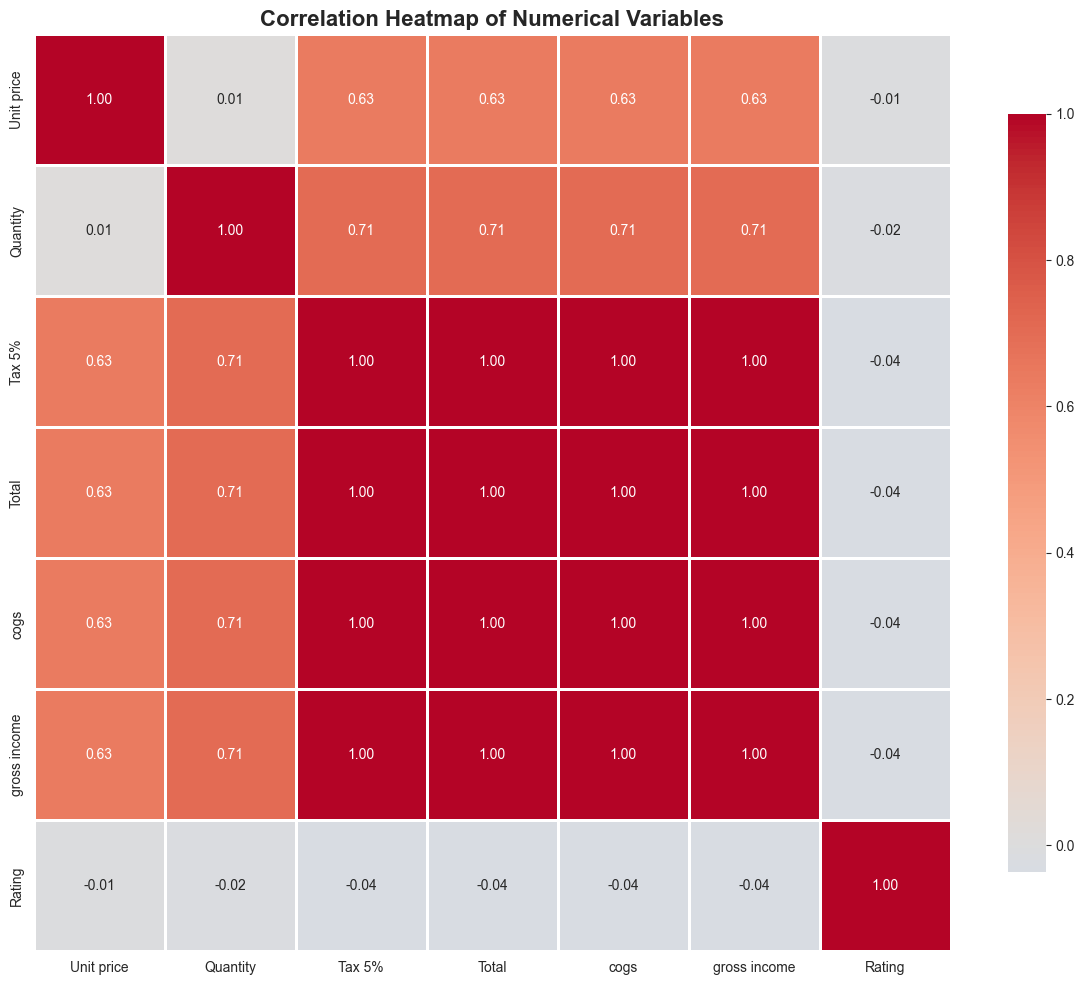

In [23]:
# Correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            fmt='.2f', linewidths=1, square=True, cbar_kws={"shrink": 0.8})
plt.title('Correlation Heatmap of Numerical Variables', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

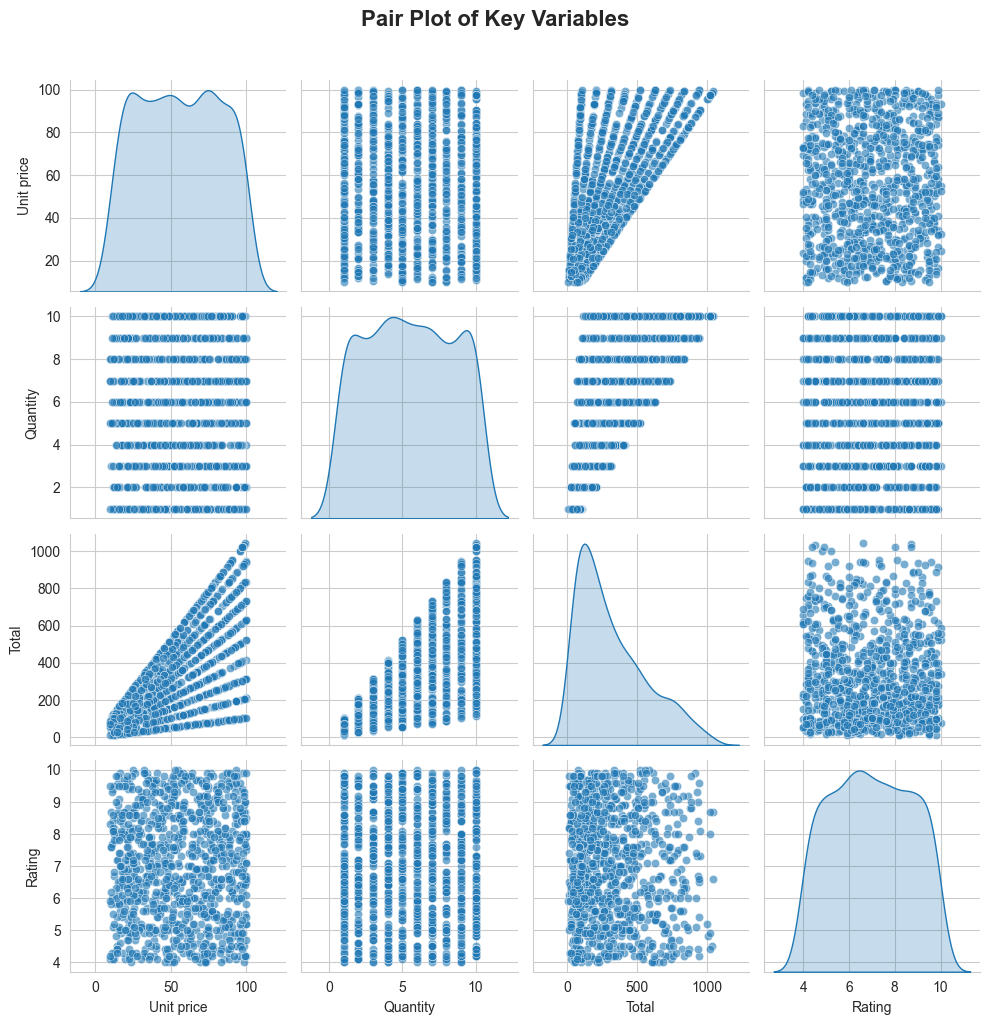

In [24]:
# Pair plot for key variables
sns.pairplot(df[['Unit price', 'Quantity', 'Total', 'Rating']], 
             diag_kind='kde', plot_kws={'alpha': 0.6})
plt.suptitle('Pair Plot of Key Variables', y=1.02, fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

## 8. Time Series Analysis

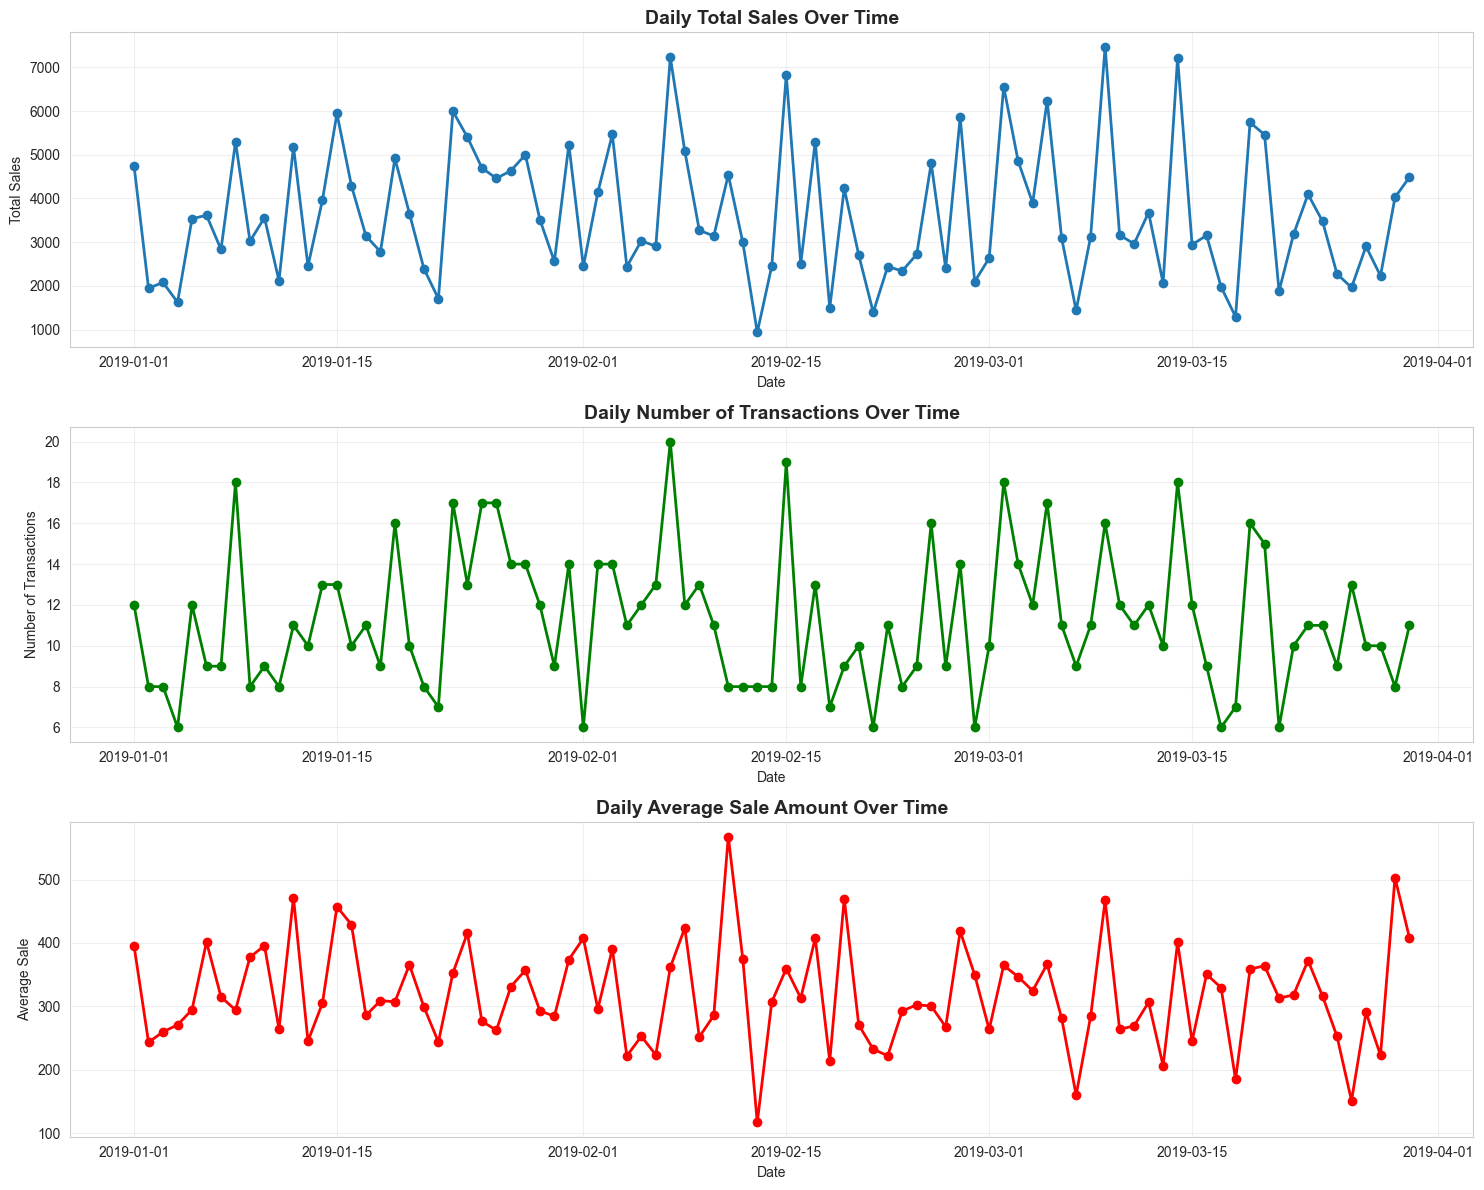

In [25]:
# Sales over time - Daily
daily_sales = df.groupby('Date')['Total'].agg(['sum', 'count', 'mean']).reset_index()
daily_sales.columns = ['Date', 'Total_Sales', 'Number_of_Transactions', 'Average_Sale']

fig, axes = plt.subplots(3, 1, figsize=(15, 12))

axes[0].plot(daily_sales['Date'], daily_sales['Total_Sales'], marker='o', linewidth=2)
axes[0].set_title('Daily Total Sales Over Time', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Total Sales')
axes[0].grid(True, alpha=0.3)

axes[1].plot(daily_sales['Date'], daily_sales['Number_of_Transactions'], 
             marker='o', color='green', linewidth=2)
axes[1].set_title('Daily Number of Transactions Over Time', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Number of Transactions')
axes[1].grid(True, alpha=0.3)

axes[2].plot(daily_sales['Date'], daily_sales['Average_Sale'], 
             marker='o', color='red', linewidth=2)
axes[2].set_title('Daily Average Sale Amount Over Time', fontsize=14, fontweight='bold')
axes[2].set_xlabel('Date')
axes[2].set_ylabel('Average Sale')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

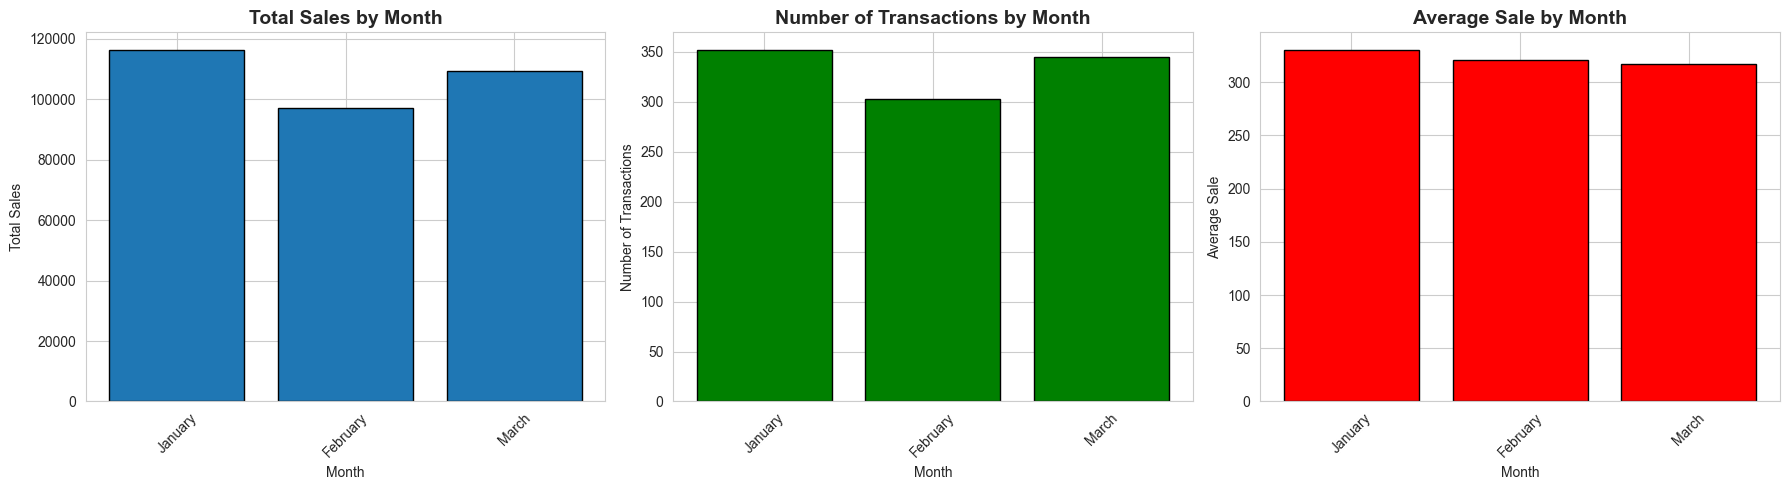

In [26]:
# Sales by month
monthly_sales = df.groupby('Month_Name')['Total'].agg(['sum', 'count', 'mean']).reset_index()

# Order months correctly
month_order = df.groupby(['Month', 'Month_Name']).size().reset_index()[['Month', 'Month_Name']].drop_duplicates().sort_values('Month')['Month_Name'].tolist()
monthly_sales['Month_Name'] = pd.Categorical(monthly_sales['Month_Name'], categories=month_order, ordered=True)
monthly_sales = monthly_sales.sort_values('Month_Name')

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

axes[0].bar(monthly_sales['Month_Name'], monthly_sales['sum'], edgecolor='black')
axes[0].set_title('Total Sales by Month', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Month')
axes[0].set_ylabel('Total Sales')
axes[0].tick_params(axis='x', rotation=45)

axes[1].bar(monthly_sales['Month_Name'], monthly_sales['count'], color='green', edgecolor='black')
axes[1].set_title('Number of Transactions by Month', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Number of Transactions')
axes[1].tick_params(axis='x', rotation=45)

axes[2].bar(monthly_sales['Month_Name'], monthly_sales['mean'], color='red', edgecolor='black')
axes[2].set_title('Average Sale by Month', fontsize=14, fontweight='bold')
axes[2].set_xlabel('Month')
axes[2].set_ylabel('Average Sale')
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

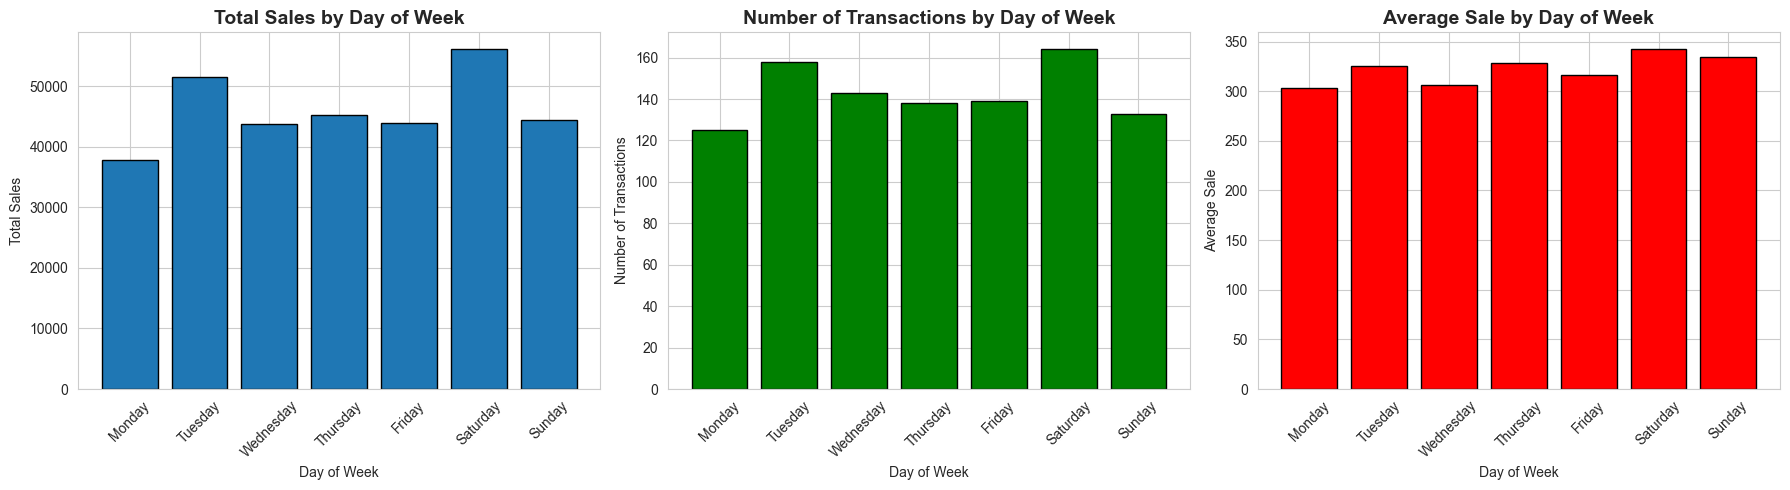

In [27]:
# Sales by day of week
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['Day_of_Week'] = pd.Categorical(df['Day_of_Week'], categories=day_order, ordered=True)
weekly_sales = df.groupby('Day_of_Week')['Total'].agg(['sum', 'count', 'mean']).reset_index()

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

axes[0].bar(weekly_sales['Day_of_Week'], weekly_sales['sum'], edgecolor='black')
axes[0].set_title('Total Sales by Day of Week', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Day of Week')
axes[0].set_ylabel('Total Sales')
axes[0].tick_params(axis='x', rotation=45)

axes[1].bar(weekly_sales['Day_of_Week'], weekly_sales['count'], color='green', edgecolor='black')
axes[1].set_title('Number of Transactions by Day of Week', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Day of Week')
axes[1].set_ylabel('Number of Transactions')
axes[1].tick_params(axis='x', rotation=45)

axes[2].bar(weekly_sales['Day_of_Week'], weekly_sales['mean'], color='red', edgecolor='black')
axes[2].set_title('Average Sale by Day of Week', fontsize=14, fontweight='bold')
axes[2].set_xlabel('Day of Week')
axes[2].set_ylabel('Average Sale')
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

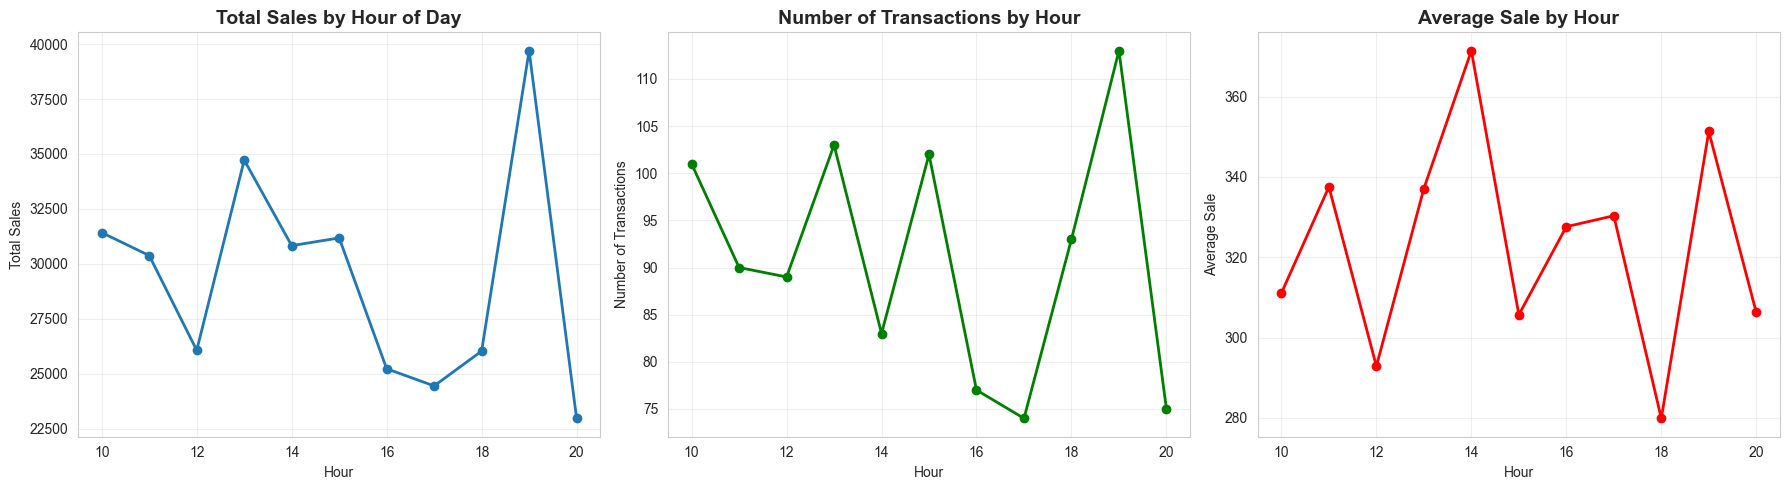

In [28]:
# Sales by hour of day
hourly_sales = df.groupby('Hour')['Total'].agg(['sum', 'count', 'mean']).reset_index()

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

axes[0].plot(hourly_sales['Hour'], hourly_sales['sum'], marker='o', linewidth=2)
axes[0].set_title('Total Sales by Hour of Day', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Hour')
axes[0].set_ylabel('Total Sales')
axes[0].grid(True, alpha=0.3)

axes[1].plot(hourly_sales['Hour'], hourly_sales['count'], marker='o', color='green', linewidth=2)
axes[1].set_title('Number of Transactions by Hour', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Hour')
axes[1].set_ylabel('Number of Transactions')
axes[1].grid(True, alpha=0.3)

axes[2].plot(hourly_sales['Hour'], hourly_sales['mean'], marker='o', color='red', linewidth=2)
axes[2].set_title('Average Sale by Hour', fontsize=14, fontweight='bold')
axes[2].set_xlabel('Hour')
axes[2].set_ylabel('Average Sale')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 9. Sales Analysis by Branch and City

In [29]:
# Sales by Branch
branch_analysis = df.groupby('Branch').agg({
    'Total': ['sum', 'mean', 'count'],
    'Quantity': 'sum',
    'gross income': 'sum',
    'Rating': 'mean'
}).round(2)

print("Sales Analysis by Branch:")
print(branch_analysis)

Sales Analysis by Branch:
            Total               Quantity gross income Rating
              sum    mean count      sum          sum   mean
Branch                                                      
A       106200.37  312.35   340     1859      5057.16   7.03
B       106197.67  319.87   332     1820      5057.03   6.82
C       110568.71  337.10   328     1831      5265.18   7.07


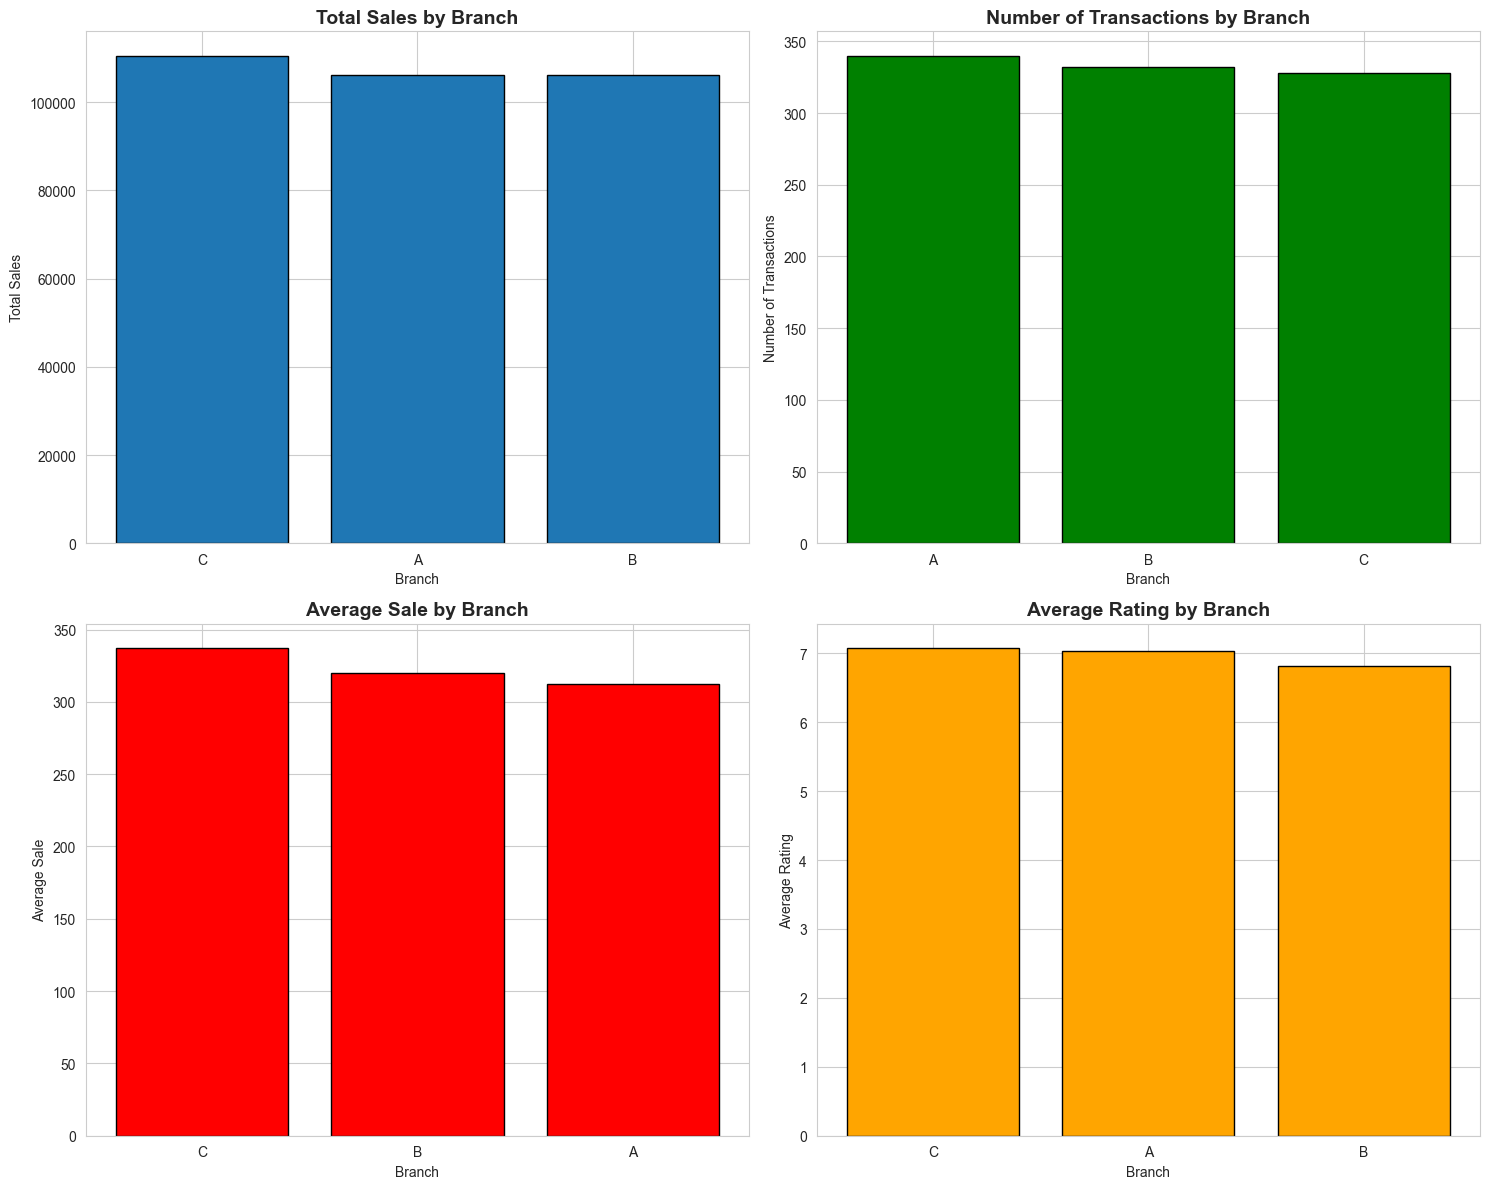

In [30]:
# Visualize Branch performance
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Total sales by branch
branch_sales = df.groupby('Branch')['Total'].sum().sort_values(ascending=False)
axes[0, 0].bar(branch_sales.index, branch_sales.values, edgecolor='black')
axes[0, 0].set_title('Total Sales by Branch', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Branch')
axes[0, 0].set_ylabel('Total Sales')

# Number of transactions by branch
branch_transactions = df.groupby('Branch').size().sort_values(ascending=False)
axes[0, 1].bar(branch_transactions.index, branch_transactions.values, color='green', edgecolor='black')
axes[0, 1].set_title('Number of Transactions by Branch', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Branch')
axes[0, 1].set_ylabel('Number of Transactions')

# Average sale by branch
branch_avg = df.groupby('Branch')['Total'].mean().sort_values(ascending=False)
axes[1, 0].bar(branch_avg.index, branch_avg.values, color='red', edgecolor='black')
axes[1, 0].set_title('Average Sale by Branch', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Branch')
axes[1, 0].set_ylabel('Average Sale')

# Average rating by branch
branch_rating = df.groupby('Branch')['Rating'].mean().sort_values(ascending=False)
axes[1, 1].bar(branch_rating.index, branch_rating.values, color='orange', edgecolor='black')
axes[1, 1].set_title('Average Rating by Branch', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Branch')
axes[1, 1].set_ylabel('Average Rating')

plt.tight_layout()
plt.show()

In [31]:
# Sales by City
city_analysis = df.groupby('City').agg({
    'Total': ['sum', 'mean', 'count'],
    'Quantity': 'sum',
    'gross income': 'sum',
    'Rating': 'mean'
}).round(2)

print("Sales Analysis by City:")
print(city_analysis)

Sales Analysis by City:
               Total               Quantity gross income Rating
                 sum    mean count      sum          sum   mean
City                                                           
Mandalay   106197.67  319.87   332     1820      5057.03   6.82
Naypyitaw  110568.71  337.10   328     1831      5265.18   7.07
Yangon     106200.37  312.35   340     1859      5057.16   7.03


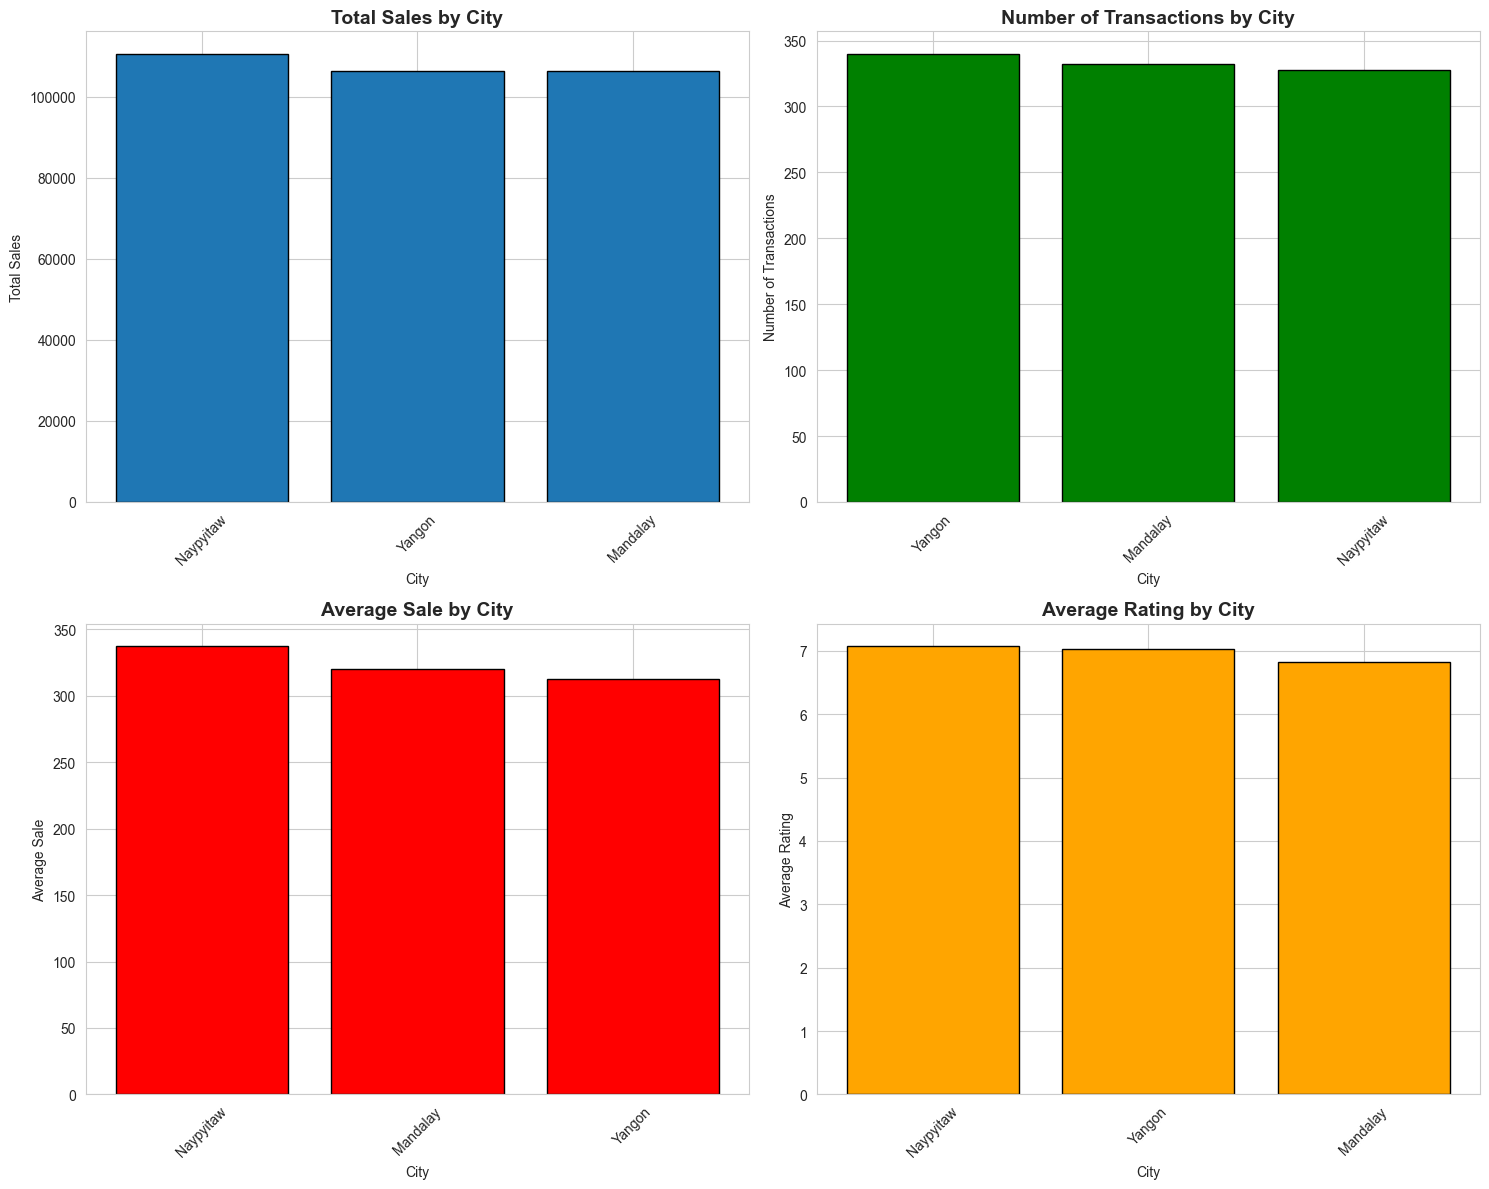

In [32]:
# Visualize City performance
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Total sales by city
city_sales = df.groupby('City')['Total'].sum().sort_values(ascending=False)
axes[0, 0].bar(city_sales.index, city_sales.values, edgecolor='black')
axes[0, 0].set_title('Total Sales by City', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('City')
axes[0, 0].set_ylabel('Total Sales')
axes[0, 0].tick_params(axis='x', rotation=45)

# Number of transactions by city
city_transactions = df.groupby('City').size().sort_values(ascending=False)
axes[0, 1].bar(city_transactions.index, city_transactions.values, color='green', edgecolor='black')
axes[0, 1].set_title('Number of Transactions by City', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('City')
axes[0, 1].set_ylabel('Number of Transactions')
axes[0, 1].tick_params(axis='x', rotation=45)

# Average sale by city
city_avg = df.groupby('City')['Total'].mean().sort_values(ascending=False)
axes[1, 0].bar(city_avg.index, city_avg.values, color='red', edgecolor='black')
axes[1, 0].set_title('Average Sale by City', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('City')
axes[1, 0].set_ylabel('Average Sale')
axes[1, 0].tick_params(axis='x', rotation=45)

# Average rating by city
city_rating = df.groupby('City')['Rating'].mean().sort_values(ascending=False)
axes[1, 1].bar(city_rating.index, city_rating.values, color='orange', edgecolor='black')
axes[1, 1].set_title('Average Rating by City', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('City')
axes[1, 1].set_ylabel('Average Rating')
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

## 10. Product Line Analysis

In [33]:
# Product line analysis
product_analysis = df.groupby('Product line').agg({
    'Total': ['sum', 'mean', 'count'],
    'Quantity': 'sum',
    'gross income': 'sum',
    'Rating': 'mean'
}).round(2)

product_analysis = product_analysis.sort_values(('Total', 'sum'), ascending=False)
print("Sales Analysis by Product Line:")
print(product_analysis)

Sales Analysis by Product Line:
                           Total               Quantity gross income Rating
                             sum    mean count      sum          sum   mean
Product line                                                               
Food and beverages      56144.84  322.67   174      952      2673.56   7.11
Sports and travel       55122.83  332.07   166      920      2624.90   6.92
Electronic accessories  54337.53  319.63   170      971      2587.50   6.92
Fashion accessories     54305.90  305.09   178      902      2586.00   7.03
Home and lifestyle      53861.91  336.64   160      911      2564.85   6.84
Health and beauty       49193.74  323.64   152      854      2342.56   7.00


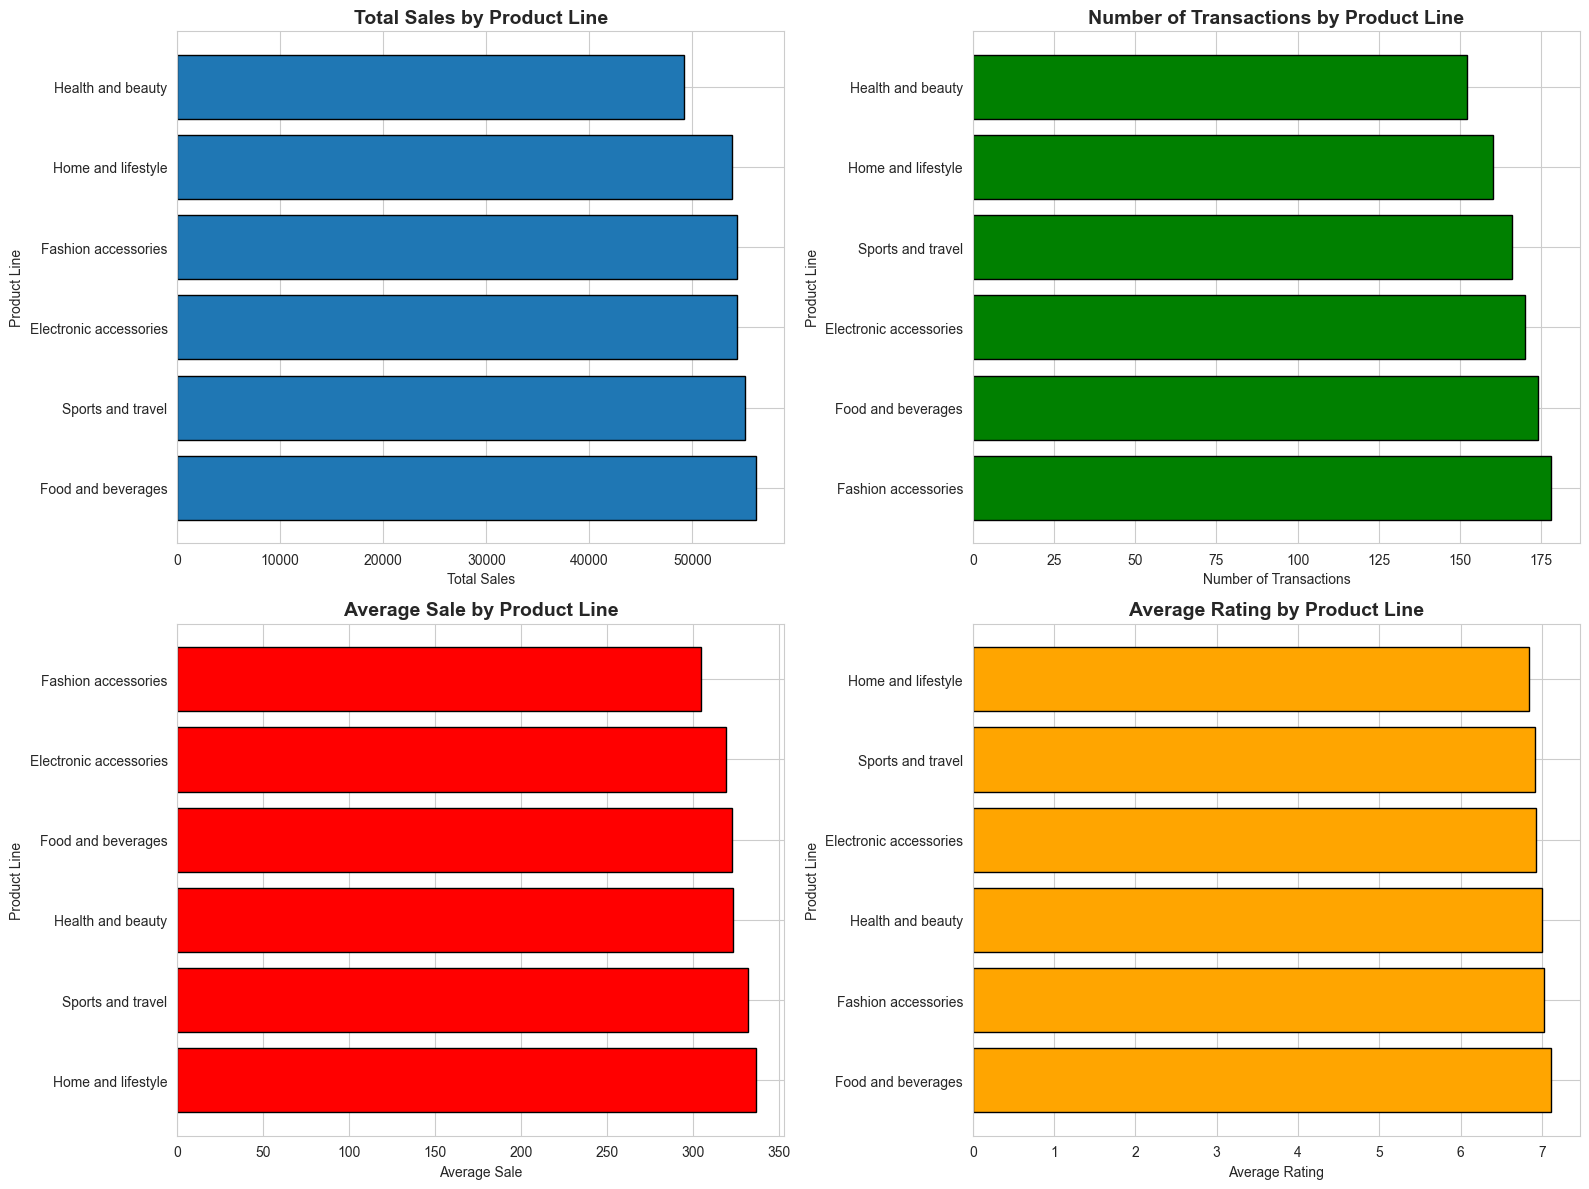

In [34]:
# Visualize Product Line performance
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Total sales by product line
product_sales = df.groupby('Product line')['Total'].sum().sort_values(ascending=False)
axes[0, 0].barh(product_sales.index, product_sales.values, edgecolor='black')
axes[0, 0].set_title('Total Sales by Product Line', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Total Sales')
axes[0, 0].set_ylabel('Product Line')

# Number of transactions by product line
product_transactions = df.groupby('Product line').size().sort_values(ascending=False)
axes[0, 1].barh(product_transactions.index, product_transactions.values, color='green', edgecolor='black')
axes[0, 1].set_title('Number of Transactions by Product Line', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Number of Transactions')
axes[0, 1].set_ylabel('Product Line')

# Average sale by product line
product_avg = df.groupby('Product line')['Total'].mean().sort_values(ascending=False)
axes[1, 0].barh(product_avg.index, product_avg.values, color='red', edgecolor='black')
axes[1, 0].set_title('Average Sale by Product Line', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Average Sale')
axes[1, 0].set_ylabel('Product Line')

# Average rating by product line
product_rating = df.groupby('Product line')['Rating'].mean().sort_values(ascending=False)
axes[1, 1].barh(product_rating.index, product_rating.values, color='orange', edgecolor='black')
axes[1, 1].set_title('Average Rating by Product Line', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Average Rating')
axes[1, 1].set_ylabel('Product Line')

plt.tight_layout()
plt.show()

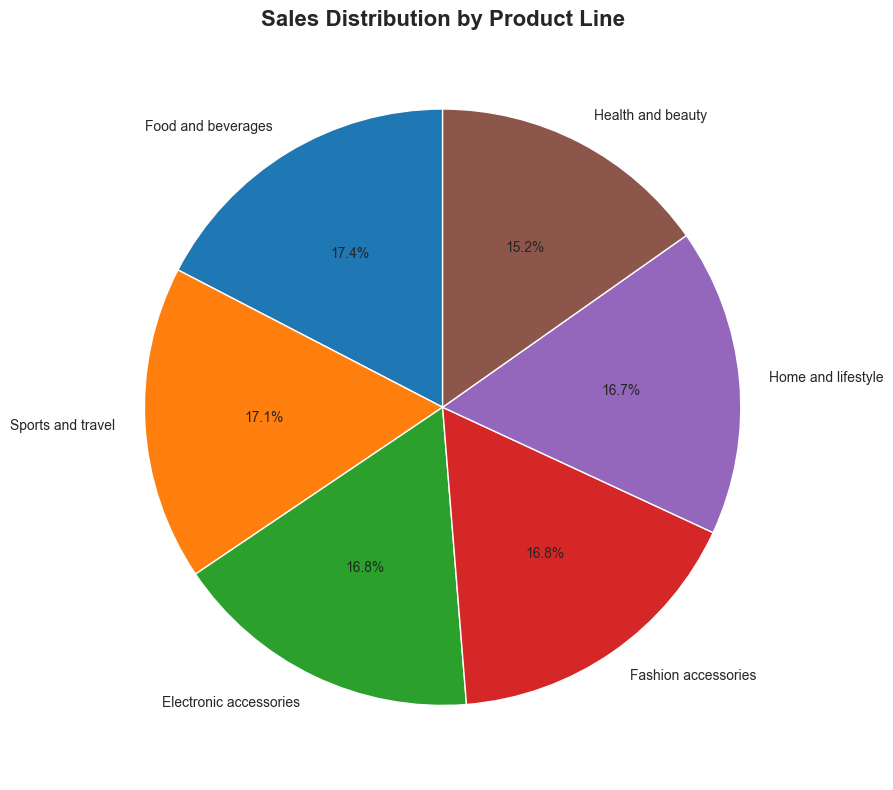

In [35]:
# Product line sales distribution pie chart
plt.figure(figsize=(10, 8))
product_sales_pct = df.groupby('Product line')['Total'].sum().sort_values(ascending=False)
plt.pie(product_sales_pct, labels=product_sales_pct.index, autopct='%1.1f%%', startangle=90)
plt.title('Sales Distribution by Product Line', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

## 11. Customer Behavior Analysis

In [36]:
# Gender analysis
gender_analysis = df.groupby('Gender').agg({
    'Total': ['sum', 'mean', 'count'],
    'Quantity': 'sum',
    'Rating': 'mean'
}).round(2)

print("Sales Analysis by Gender:")
print(gender_analysis)

Sales Analysis by Gender:
            Total               Quantity Rating
              sum    mean count      sum   mean
Gender                                         
Female  167882.92  335.10   501     2869   6.96
Male    155083.82  310.79   499     2641   6.98


In [37]:
# Customer type analysis
customer_type_analysis = df.groupby('Customer type').agg({
    'Total': ['sum', 'mean', 'count'],
    'Quantity': 'sum',
    'Rating': 'mean'
}).round(2)

print("Sales Analysis by Customer Type:")
print(customer_type_analysis)

Sales Analysis by Customer Type:
                   Total               Quantity Rating
                     sum    mean count      sum   mean
Customer type                                         
Member         164223.44  327.79   501     2785   6.94
Normal         158743.30  318.12   499     2725   7.01


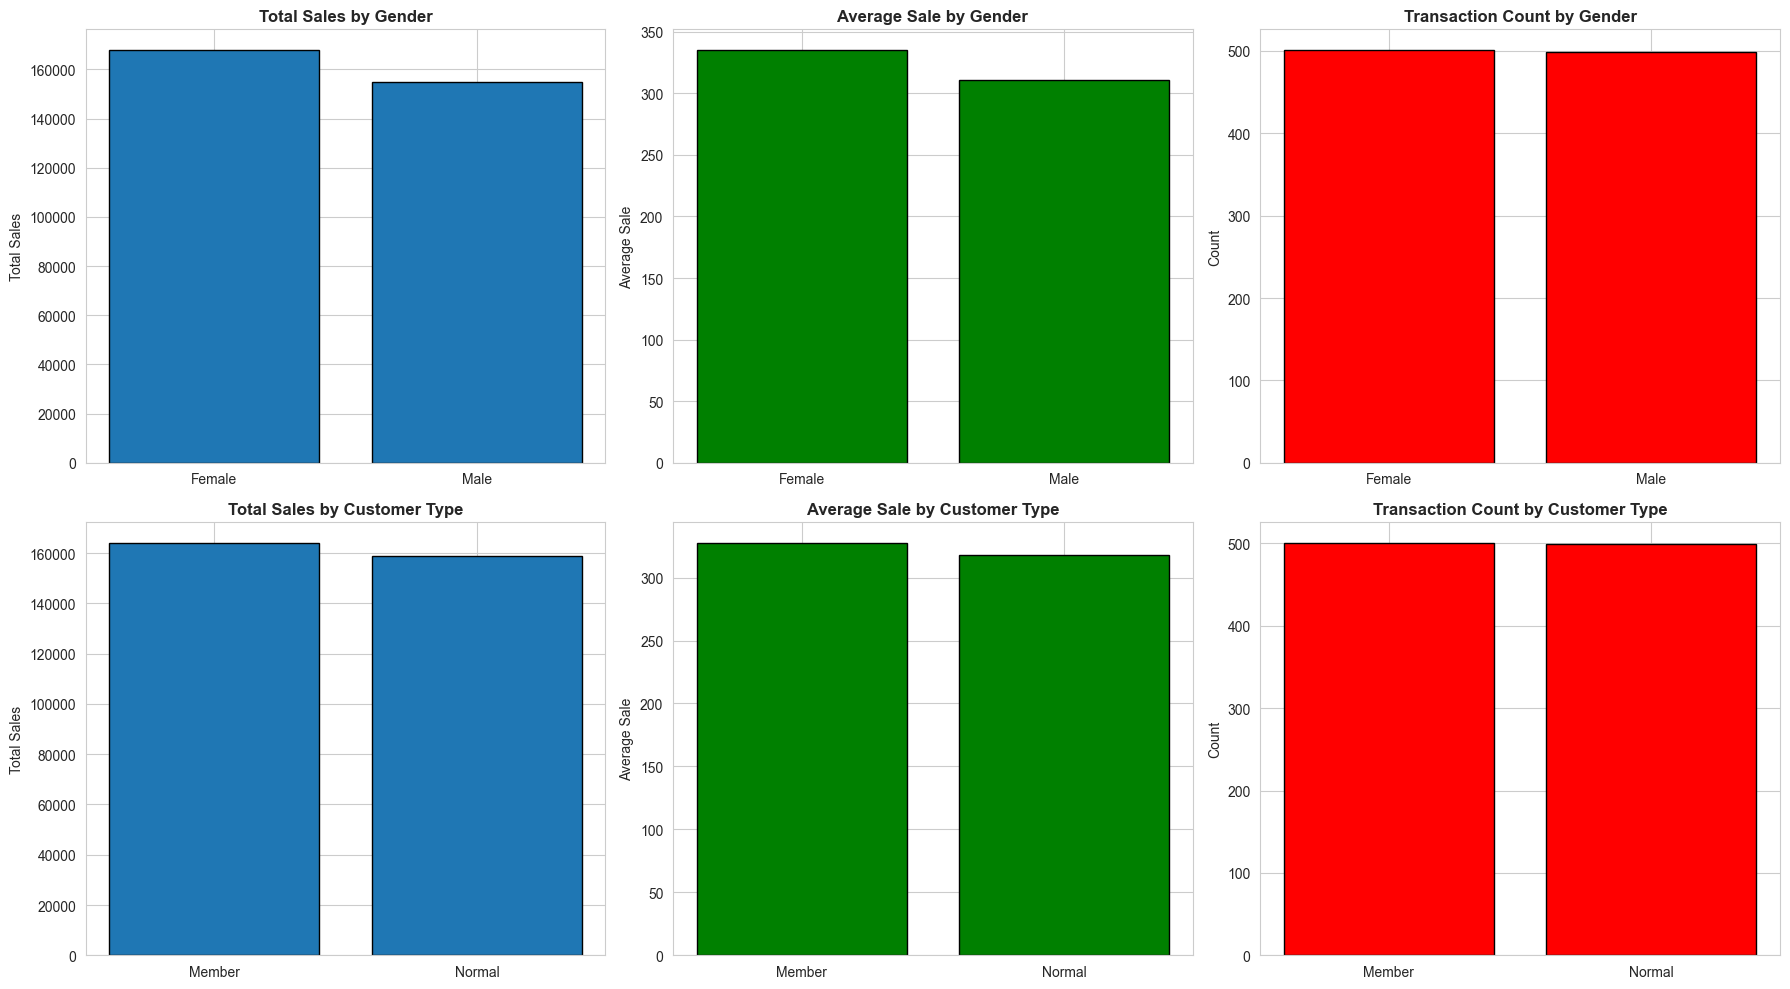

In [38]:
# Visualize customer behavior
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Gender - Total sales
gender_sales = df.groupby('Gender')['Total'].sum()
axes[0, 0].bar(gender_sales.index, gender_sales.values, edgecolor='black')
axes[0, 0].set_title('Total Sales by Gender', fontsize=12, fontweight='bold')
axes[0, 0].set_ylabel('Total Sales')

# Gender - Average sale
gender_avg = df.groupby('Gender')['Total'].mean()
axes[0, 1].bar(gender_avg.index, gender_avg.values, color='green', edgecolor='black')
axes[0, 1].set_title('Average Sale by Gender', fontsize=12, fontweight='bold')
axes[0, 1].set_ylabel('Average Sale')

# Gender - Count
gender_count = df.groupby('Gender').size()
axes[0, 2].bar(gender_count.index, gender_count.values, color='red', edgecolor='black')
axes[0, 2].set_title('Transaction Count by Gender', fontsize=12, fontweight='bold')
axes[0, 2].set_ylabel('Count')

# Customer Type - Total sales
customer_sales = df.groupby('Customer type')['Total'].sum()
axes[1, 0].bar(customer_sales.index, customer_sales.values, edgecolor='black')
axes[1, 0].set_title('Total Sales by Customer Type', fontsize=12, fontweight='bold')
axes[1, 0].set_ylabel('Total Sales')

# Customer Type - Average sale
customer_avg = df.groupby('Customer type')['Total'].mean()
axes[1, 1].bar(customer_avg.index, customer_avg.values, color='green', edgecolor='black')
axes[1, 1].set_title('Average Sale by Customer Type', fontsize=12, fontweight='bold')
axes[1, 1].set_ylabel('Average Sale')

# Customer Type - Count
customer_count = df.groupby('Customer type').size()
axes[1, 2].bar(customer_count.index, customer_count.values, color='red', edgecolor='black')
axes[1, 2].set_title('Transaction Count by Customer Type', fontsize=12, fontweight='bold')
axes[1, 2].set_ylabel('Count')

plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

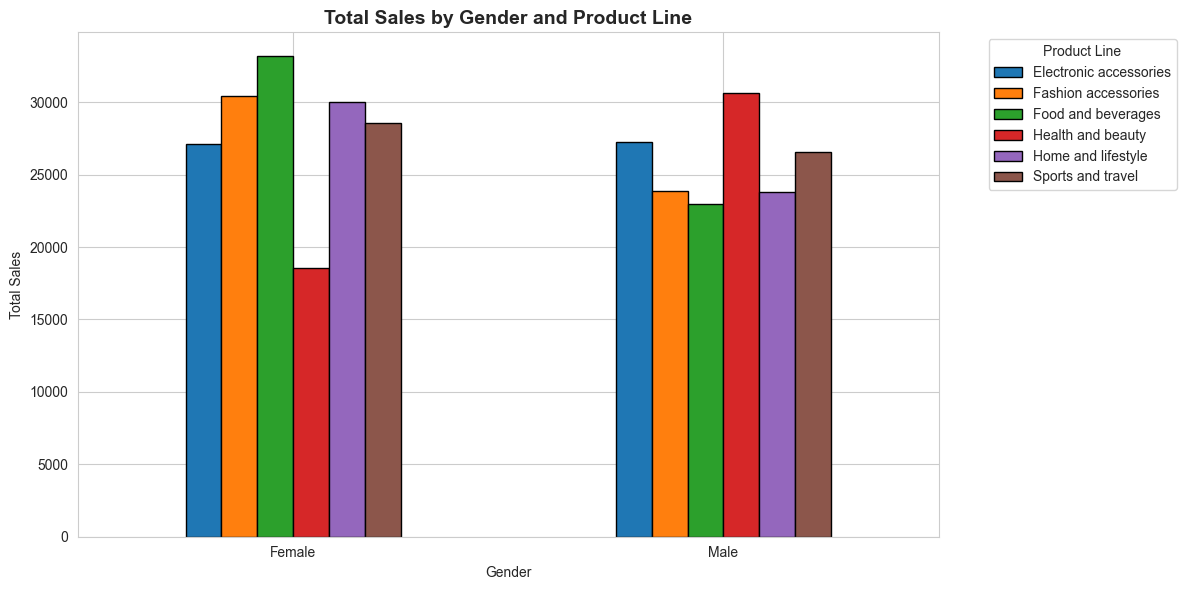

In [39]:
# Gender vs Product Line
gender_product = pd.crosstab(df['Gender'], df['Product line'], values=df['Total'], aggfunc='sum')

plt.figure(figsize=(12, 6))
gender_product.plot(kind='bar', edgecolor='black')
plt.title('Total Sales by Gender and Product Line', fontsize=14, fontweight='bold')
plt.xlabel('Gender')
plt.ylabel('Total Sales')
plt.legend(title='Product Line', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

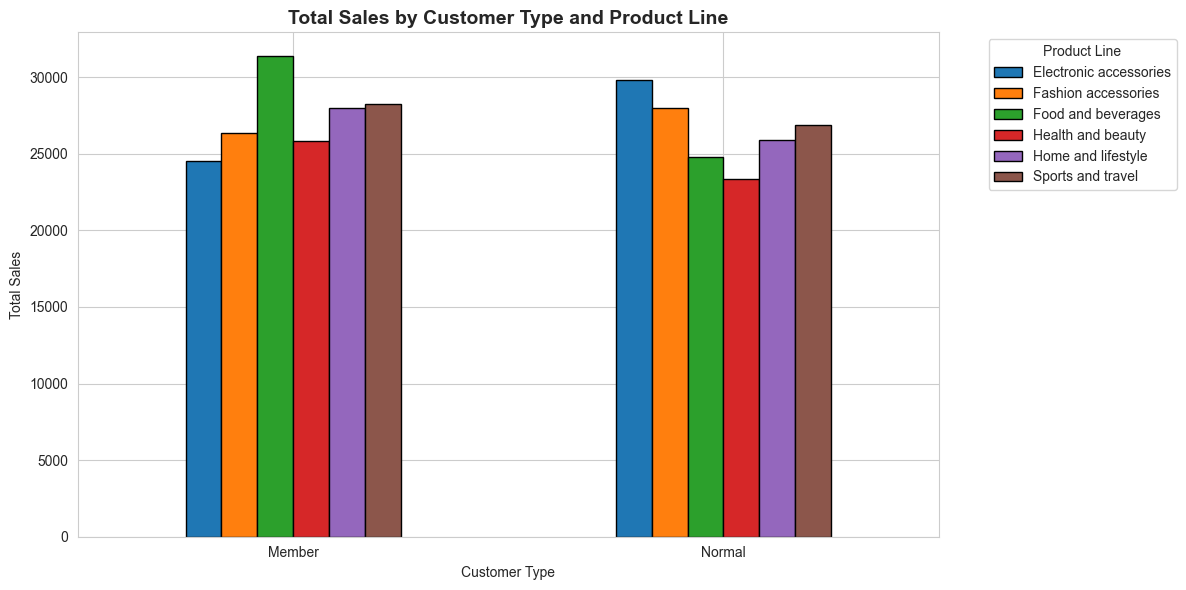

In [40]:
# Customer Type vs Product Line
customer_product = pd.crosstab(df['Customer type'], df['Product line'], values=df['Total'], aggfunc='sum')

plt.figure(figsize=(12, 6))
customer_product.plot(kind='bar', edgecolor='black')
plt.title('Total Sales by Customer Type and Product Line', fontsize=14, fontweight='bold')
plt.xlabel('Customer Type')
plt.ylabel('Total Sales')
plt.legend(title='Product Line', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

## 12. Payment Method Analysis

In [41]:
# Payment method analysis
payment_analysis = df.groupby('Payment').agg({
    'Total': ['sum', 'mean', 'count'],
    'Rating': 'mean'
}).round(2)

print("Sales Analysis by Payment Method:")
print(payment_analysis)

Sales Analysis by Payment Method:
                 Total               Rating
                   sum    mean count   mean
Payment                                    
Cash         112206.57  326.18   344   6.97
Credit card  100767.07  324.01   311   7.00
Ewallet      109993.11  318.82   345   6.95


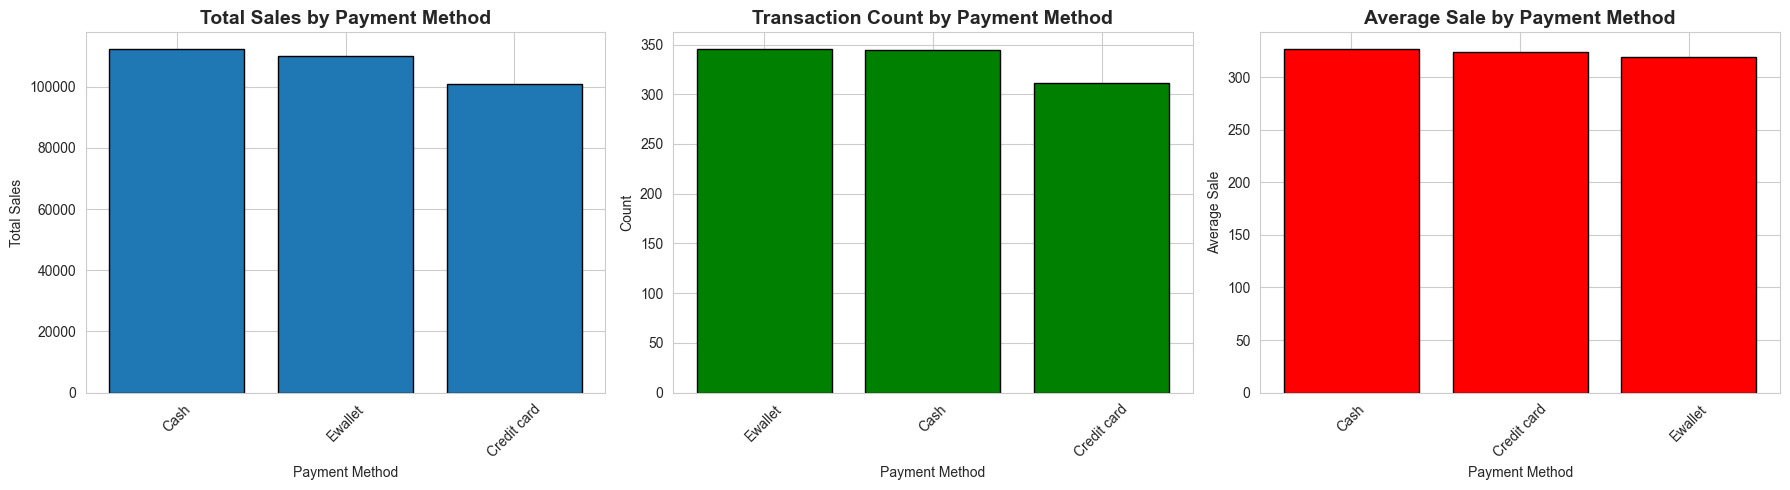

In [42]:
# Visualize payment methods
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Total sales by payment method
payment_sales = df.groupby('Payment')['Total'].sum().sort_values(ascending=False)
axes[0].bar(payment_sales.index, payment_sales.values, edgecolor='black')
axes[0].set_title('Total Sales by Payment Method', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Payment Method')
axes[0].set_ylabel('Total Sales')
axes[0].tick_params(axis='x', rotation=45)

# Transaction count by payment method
payment_count = df.groupby('Payment').size().sort_values(ascending=False)
axes[1].bar(payment_count.index, payment_count.values, color='green', edgecolor='black')
axes[1].set_title('Transaction Count by Payment Method', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Payment Method')
axes[1].set_ylabel('Count')
axes[1].tick_params(axis='x', rotation=45)

# Average sale by payment method
payment_avg = df.groupby('Payment')['Total'].mean().sort_values(ascending=False)
axes[2].bar(payment_avg.index, payment_avg.values, color='red', edgecolor='black')
axes[2].set_title('Average Sale by Payment Method', fontsize=14, fontweight='bold')
axes[2].set_xlabel('Payment Method')
axes[2].set_ylabel('Average Sale')
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

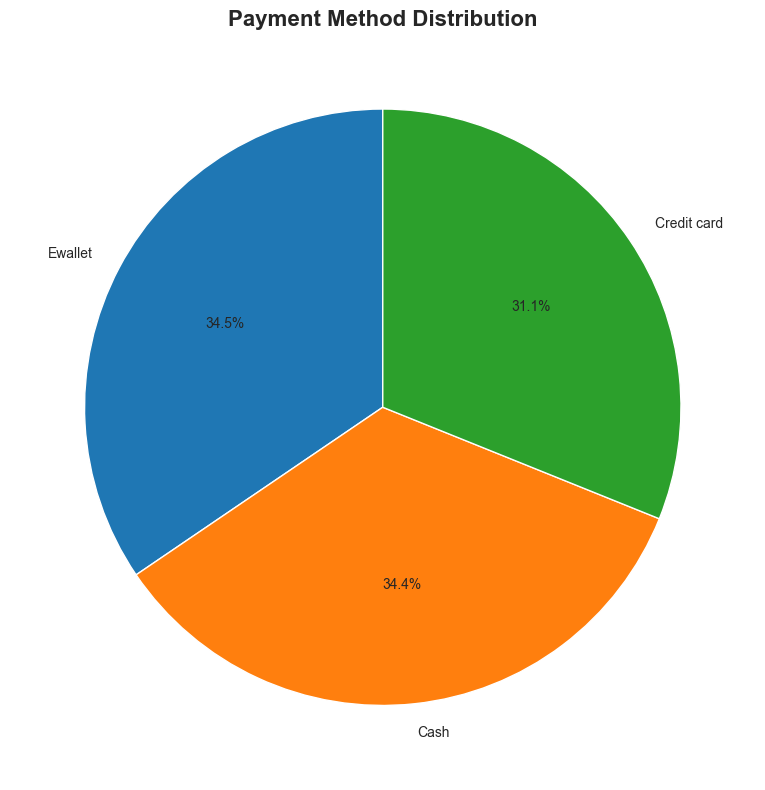

In [43]:
# Payment method usage pie chart
plt.figure(figsize=(10, 8))
payment_pct = df['Payment'].value_counts()
plt.pie(payment_pct, labels=payment_pct.index, autopct='%1.1f%%', startangle=90)
plt.title('Payment Method Distribution', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

## 13. Rating Analysis

In [44]:
# Overall rating statistics
print("Rating Statistics:")
print(f"Average Rating: {df['Rating'].mean():.2f}")
print(f"Median Rating: {df['Rating'].median():.2f}")
print(f"Mode Rating: {df['Rating'].mode()[0]:.2f}")
print(f"Std Dev: {df['Rating'].std():.2f}")
print(f"Min Rating: {df['Rating'].min():.2f}")
print(f"Max Rating: {df['Rating'].max():.2f}")

Rating Statistics:
Average Rating: 6.97
Median Rating: 7.00
Mode Rating: 6.00
Std Dev: 1.72
Min Rating: 4.00
Max Rating: 10.00


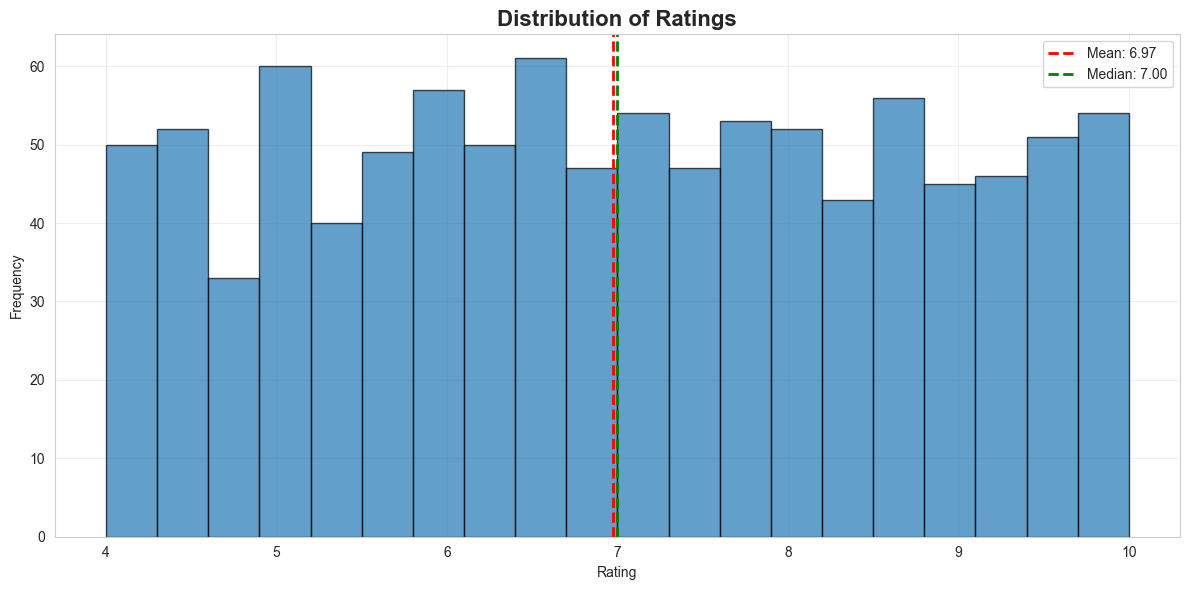

In [45]:
# Rating distribution
plt.figure(figsize=(12, 6))
plt.hist(df['Rating'], bins=20, edgecolor='black', alpha=0.7)
plt.axvline(df['Rating'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {df["Rating"].mean():.2f}')
plt.axvline(df['Rating'].median(), color='green', linestyle='--', linewidth=2, label=f'Median: {df["Rating"].median():.2f}')
plt.title('Distribution of Ratings', fontsize=16, fontweight='bold')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

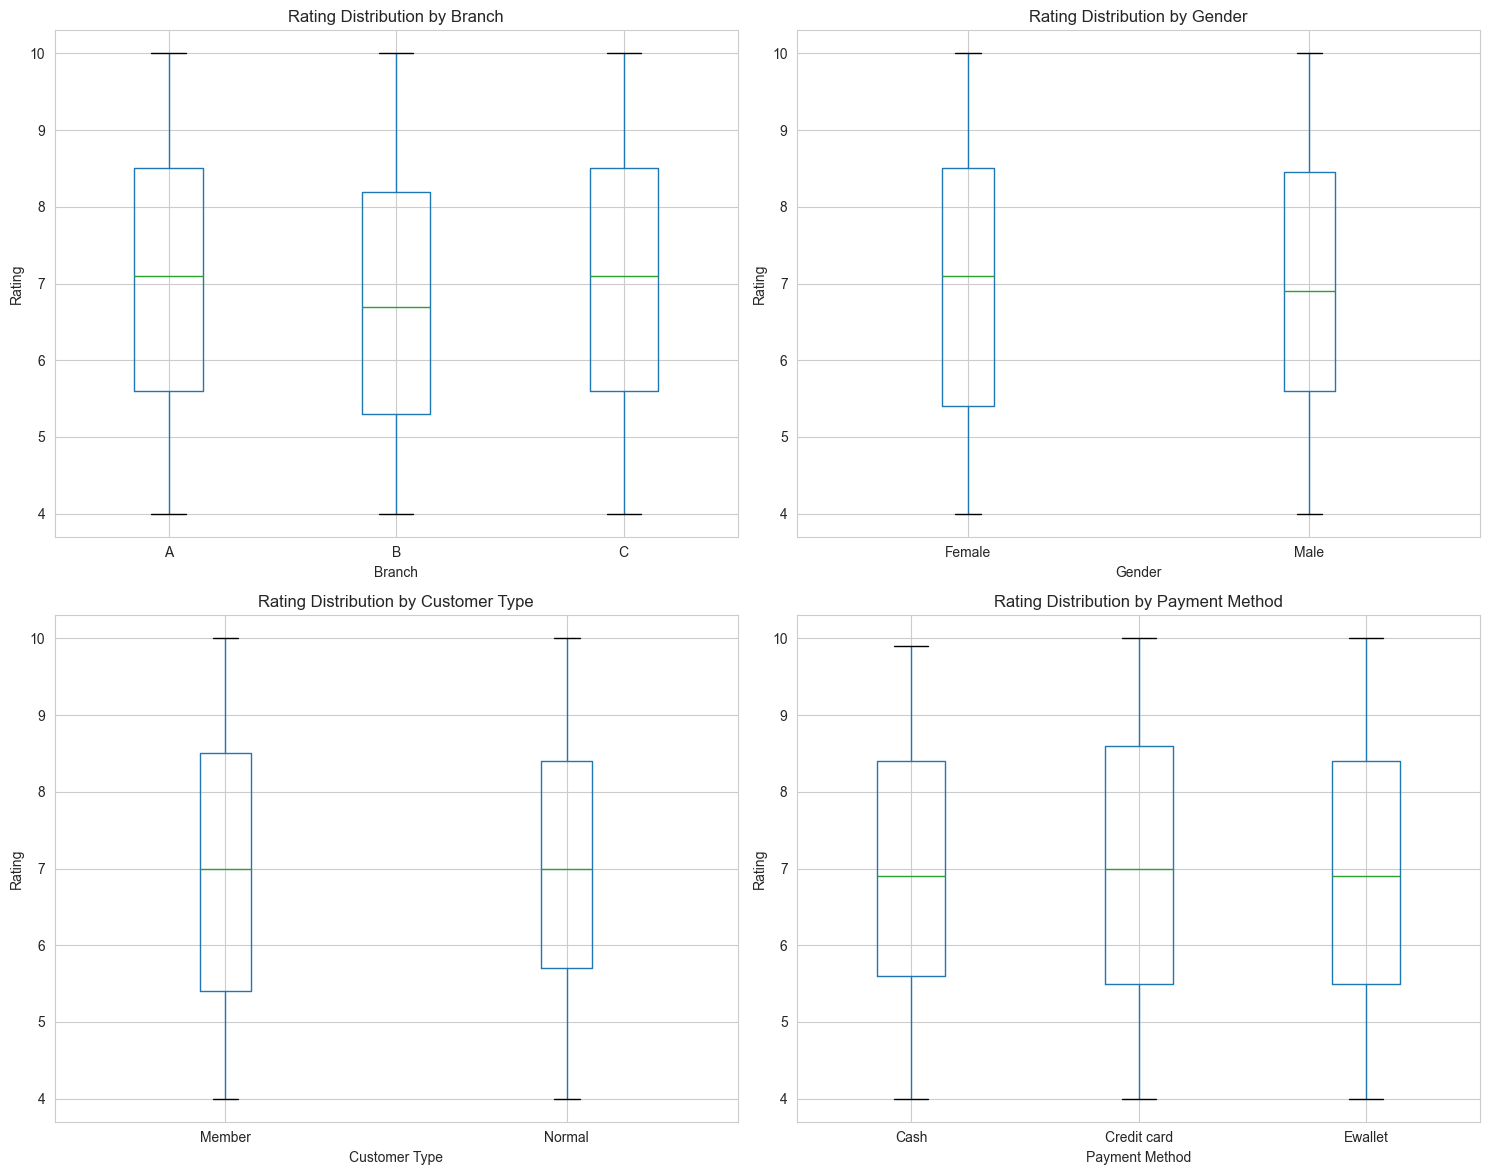

In [46]:
# Rating by different dimensions
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Rating by Branch
df.boxplot(column='Rating', by='Branch', ax=axes[0, 0])
axes[0, 0].set_title('Rating Distribution by Branch')
axes[0, 0].set_xlabel('Branch')
axes[0, 0].set_ylabel('Rating')

# Rating by Gender
df.boxplot(column='Rating', by='Gender', ax=axes[0, 1])
axes[0, 1].set_title('Rating Distribution by Gender')
axes[0, 1].set_xlabel('Gender')
axes[0, 1].set_ylabel('Rating')

# Rating by Customer Type
df.boxplot(column='Rating', by='Customer type', ax=axes[1, 0])
axes[1, 0].set_title('Rating Distribution by Customer Type')
axes[1, 0].set_xlabel('Customer Type')
axes[1, 0].set_ylabel('Rating')

# Rating by Payment Method
df.boxplot(column='Rating', by='Payment', ax=axes[1, 1])
axes[1, 1].set_title('Rating Distribution by Payment Method')
axes[1, 1].set_xlabel('Payment Method')
axes[1, 1].set_ylabel('Rating')

plt.suptitle('')
plt.tight_layout()
plt.show()

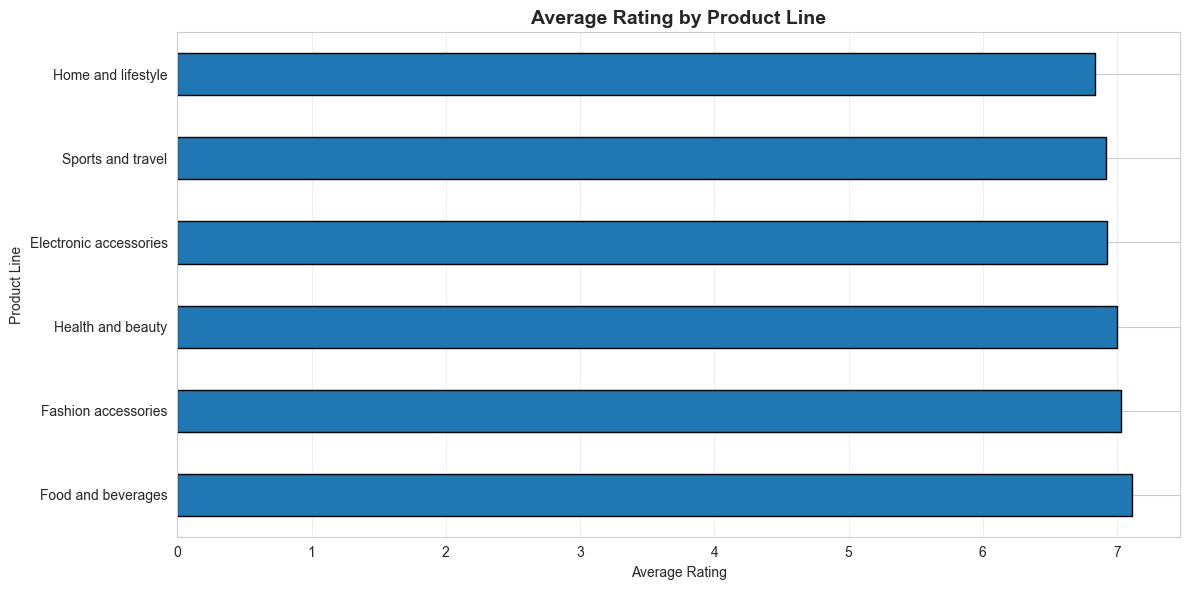

In [47]:
# Average rating by product line
plt.figure(figsize=(12, 6))
rating_by_product = df.groupby('Product line')['Rating'].mean().sort_values(ascending=False)
rating_by_product.plot(kind='barh', edgecolor='black')
plt.title('Average Rating by Product Line', fontsize=14, fontweight='bold')
plt.xlabel('Average Rating')
plt.ylabel('Product Line')
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

## 14. Bivariate Analysis

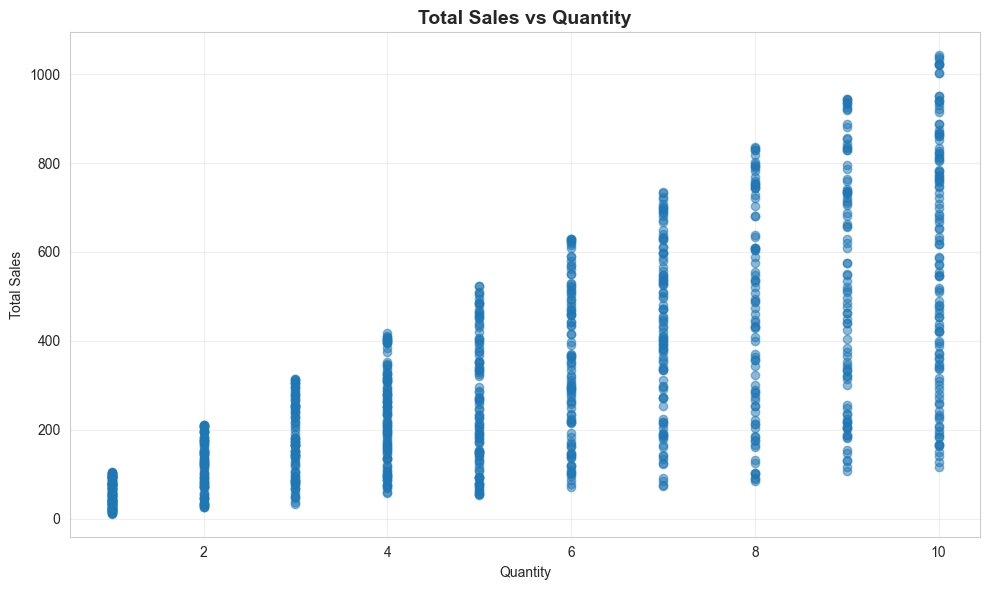

Correlation between Quantity and Total: 0.7055


In [48]:
# Total vs Quantity
plt.figure(figsize=(10, 6))
plt.scatter(df['Quantity'], df['Total'], alpha=0.5)
plt.title('Total Sales vs Quantity', fontsize=14, fontweight='bold')
plt.xlabel('Quantity')
plt.ylabel('Total Sales')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"Correlation between Quantity and Total: {df['Quantity'].corr(df['Total']):.4f}")

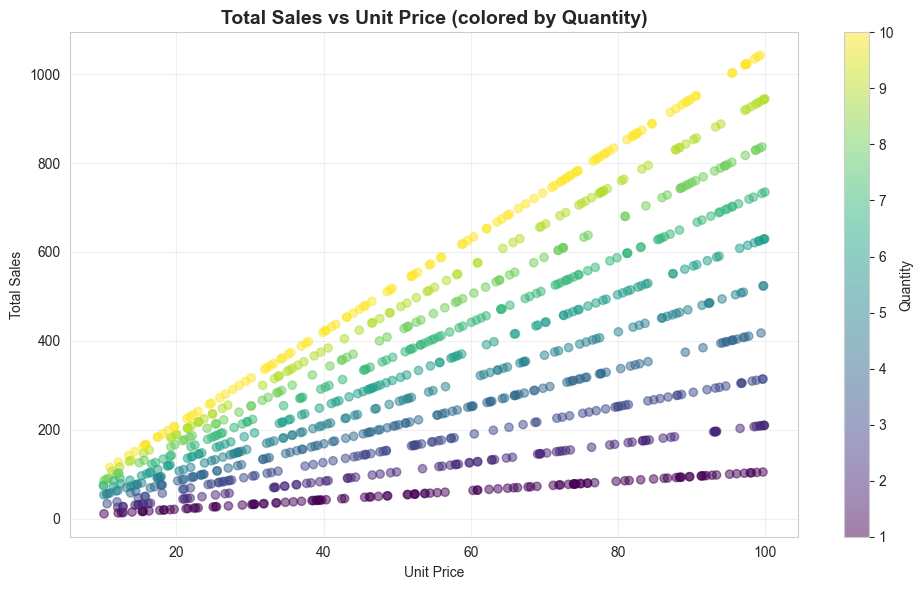

Correlation between Unit Price and Total: 0.6340


In [49]:
# Unit Price vs Total
plt.figure(figsize=(10, 6))
plt.scatter(df['Unit price'], df['Total'], alpha=0.5, c=df['Quantity'], cmap='viridis')
plt.colorbar(label='Quantity')
plt.title('Total Sales vs Unit Price (colored by Quantity)', fontsize=14, fontweight='bold')
plt.xlabel('Unit Price')
plt.ylabel('Total Sales')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"Correlation between Unit Price and Total: {df['Unit price'].corr(df['Total']):.4f}")

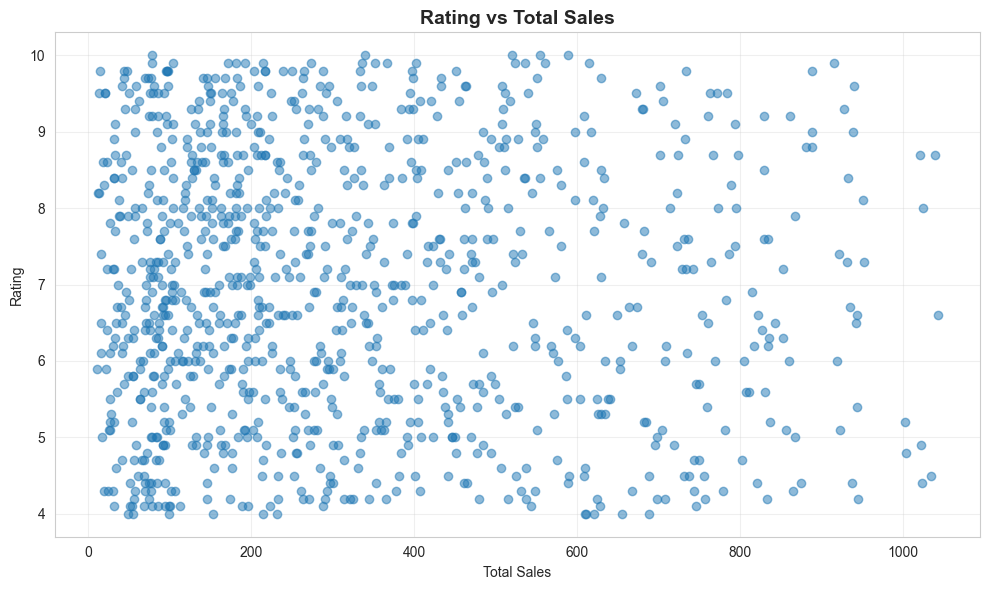

Correlation between Total and Rating: -0.0364


In [50]:
# Rating vs Total
plt.figure(figsize=(10, 6))
plt.scatter(df['Total'], df['Rating'], alpha=0.5)
plt.title('Rating vs Total Sales', fontsize=14, fontweight='bold')
plt.xlabel('Total Sales')
plt.ylabel('Rating')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"Correlation between Total and Rating: {df['Total'].corr(df['Rating']):.4f}")

## 15. Advanced Insights and Summary

In [51]:
# Top 10 highest sales transactions
print("Top 10 Highest Sales Transactions:")
top_10_sales = df.nlargest(10, 'Total')[['Invoice ID', 'Branch', 'City', 'Product line', 'Total', 'Quantity', 'Rating', 'Date']]
print(top_10_sales)

Top 10 Highest Sales Transactions:
      Invoice ID Branch       City         Product line     Total  Quantity  \
350  860-79-0874      C  Naypyitaw  Fashion accessories  1042.650        10   
167  687-47-8271      A     Yangon  Fashion accessories  1039.290        10   
557  283-26-5248      C  Naypyitaw   Food and beverages  1034.460        10   
699  751-41-9720      C  Naypyitaw   Home and lifestyle  1023.750        10   
996  303-96-2227      B   Mandalay   Home and lifestyle  1022.490        10   
792  744-16-7898      B   Mandalay   Home and lifestyle  1022.385        10   
422  271-88-8734      C  Naypyitaw  Fashion accessories  1020.705        10   
166  234-65-2137      C  Naypyitaw   Home and lifestyle  1003.590        10   
357  554-42-2417      C  Naypyitaw    Sports and travel  1002.120        10   
429  325-77-6186      A     Yangon   Home and lifestyle   951.825        10   

     Rating       Date  
350     6.6 2019-02-15  
167     8.7 2019-02-08  
557     4.5 2019-01-

In [52]:
# Bottom 10 lowest sales transactions
print("Bottom 10 Lowest Sales Transactions:")
bottom_10_sales = df.nsmallest(10, 'Total')[['Invoice ID', 'Branch', 'City', 'Product line', 'Total', 'Quantity', 'Rating', 'Date']]
print(bottom_10_sales)

Bottom 10 Lowest Sales Transactions:
      Invoice ID Branch       City         Product line    Total  Quantity  \
822  784-21-9238      C  Naypyitaw    Sports and travel  10.6785         1   
629  308-39-1707      A     Yangon  Fashion accessories  12.6945         1   
223  279-62-1445      C  Naypyitaw  Fashion accessories  13.1670         1   
443  192-98-7397      C  Naypyitaw  Fashion accessories  13.4190         1   
402  236-86-3015      C  Naypyitaw   Home and lifestyle  14.6790         1   
282  490-29-1201      A     Yangon    Sports and travel  16.1070         1   
53   778-71-5554      C  Naypyitaw  Fashion accessories  16.2015         1   
962  593-08-5916      A     Yangon  Fashion accessories  16.2750         1   
424  489-64-4354      C  Naypyitaw  Fashion accessories  17.0940         1   
808  559-61-5987      B   Mandalay    Health and beauty  18.6375         1   

     Rating       Date  
822     5.9 2019-02-07  
629     8.2 2019-01-26  
223     8.2 2019-02-21  
443 

In [53]:
# Overall summary statistics
print("="*80)
print("OVERALL SUMMARY STATISTICS")
print("="*80)
print(f"\nTotal Revenue: ${df['Total'].sum():,.2f}")
print(f"Total Transactions: {len(df):,}")
print(f"Average Transaction Value: ${df['Total'].mean():,.2f}")
print(f"Total Gross Income: ${df['gross income'].sum():,.2f}")
print(f"Total Items Sold: {df['Quantity'].sum():,}")
print(f"Average Items per Transaction: {df['Quantity'].mean():.2f}")
print(f"Average Rating: {df['Rating'].mean():.2f}/10")

print("\n" + "="*80)
print("BREAKDOWN BY CATEGORY")
print("="*80)

print(f"\nNumber of Branches: {df['Branch'].nunique()}")
print(f"Number of Cities: {df['City'].nunique()}")
print(f"Number of Product Lines: {df['Product line'].nunique()}")
print(f"Number of Payment Methods: {df['Payment'].nunique()}")

print(f"\nBest Performing Branch (by sales): {df.groupby('Branch')['Total'].sum().idxmax()}")
print(f"Best Performing City (by sales): {df.groupby('City')['Total'].sum().idxmax()}")
print(f"Best Selling Product Line: {df.groupby('Product line')['Total'].sum().idxmax()}")
print(f"Most Popular Payment Method: {df['Payment'].mode()[0]}")

print(f"\nHighest Rated Branch: {df.groupby('Branch')['Rating'].mean().idxmax()}")
print(f"Highest Rated Product Line: {df.groupby('Product line')['Rating'].mean().idxmax()}")

OVERALL SUMMARY STATISTICS

Total Revenue: $322,966.75
Total Transactions: 1,000
Average Transaction Value: $322.97
Total Gross Income: $15,379.37
Total Items Sold: 5,510
Average Items per Transaction: 5.51
Average Rating: 6.97/10

BREAKDOWN BY CATEGORY

Number of Branches: 3
Number of Cities: 3
Number of Product Lines: 6
Number of Payment Methods: 3

Best Performing Branch (by sales): C
Best Performing City (by sales): Naypyitaw
Best Selling Product Line: Food and beverages
Most Popular Payment Method: Ewallet

Highest Rated Branch: C
Highest Rated Product Line: Food and beverages


In [54]:
# Create a comprehensive summary table
summary_data = {
    'Metric': [
        'Total Revenue',
        'Total Transactions',
        'Average Transaction Value',
        'Total Gross Income',
        'Total Items Sold',
        'Average Items per Transaction',
        'Average Rating',
        'Date Range'
    ],
    'Value': [
        f"${df['Total'].sum():,.2f}",
        f"{len(df):,}",
        f"${df['Total'].mean():,.2f}",
        f"${df['gross income'].sum():,.2f}",
        f"{df['Quantity'].sum():,}",
        f"{df['Quantity'].mean():.2f}",
        f"{df['Rating'].mean():.2f}/10",
        f"{df['Date'].min().date()} to {df['Date'].max().date()}"
    ]
}

summary_df = pd.DataFrame(summary_data)
print("\nSummary Table:")
print(summary_df.to_string(index=False))


Summary Table:
                       Metric                    Value
                Total Revenue              $322,966.75
           Total Transactions                    1,000
    Average Transaction Value                  $322.97
           Total Gross Income               $15,379.37
             Total Items Sold                    5,510
Average Items per Transaction                     5.51
               Average Rating                  6.97/10
                   Date Range 2019-01-01 to 2019-03-30


## 16. Key Findings and Insights

Based on this exploratory data analysis, here are the key findings:

### Data Quality
- The dataset is clean with no missing values
- No duplicate transactions found
- All data types are appropriate

### Sales Performance
- Total revenue and transaction patterns across different dimensions
- Identification of best and worst performing categories
- Seasonal and temporal patterns in sales

### Customer Behavior
- Customer preferences by gender and membership type
- Payment method preferences
- Product line preferences by customer segments

### Product Insights
- Best and worst performing product lines
- Average ratings by product category
- Price sensitivity and quantity patterns

### Temporal Patterns
- Peak sales hours and days
- Monthly trends
- Weekly patterns

### Recommendations
- Focus on high-performing product lines
- Optimize inventory for peak hours
- Target marketing based on customer segments
- Improve low-rated product lines or consider discontinuation
- Leverage popular payment methods for promotions